# Mixing length integral, data efficient sampling

The goal is to assess the mixing length integral for a specified point in the parameter space.

This involves sampling over ky, computing $k_\perp$ and then integrating $\int_0^\infty\frac{\gamma(k_y)}{<k_\perp>²}dk_y$

An important aspect is efecient $k_y$ sampling. In the core we suspect a fixed grid enought, since there should only be 2 smooth bumps. In the pedestal we expect many more bumps at different locations for different parts in the parameter space. 

## CPU hour gains

assuming we want to fill the space like qualikeys and use on the order of 10⁶ data points, each one with 16 ky values. 

time to run [((10⁶)/2 ) * 20 sec + ((10⁶/2 ) * 100 sec * 400 cpu's ]/(60*60) = cpuh_1

Every ky point we remove would save around 6 million cpu hours. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

converged_sec = ((10**6)/2 ) * 20
non_converged_sec = ((10**6)/2 ) * 100 
cpu_s = 400
cpuh2 = ((converged_sec+non_converged_sec) * cpu_s)/(60*60)
print(cpuh2)    

# cpuh = []
# dif = []
# for i in range(6,20):
#     converged_sec = ((10**6*i)/2 ) * 20
#     non_converged_sec = ((10**6*i)/2 ) * 100 
#     cpu_s = 400
#     cpuh_ = (converged_sec+non_converged_sec) * cpu_s/(60*60)
#     cpuh.append(cpuh_)
#     if i>6:
#         dif.append(cpuh_-cpuh[-2])

# plt.plot(dif)
# # plt.yscale('log')
# print(dif)

6666666.666666667


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
config = Config(local=True)

remote_save_dir = '/scratch/project_462000451/gene_out/gene_auto/1D_ky_high_grad'
local_save_dir = '/home/djdaniel/DEEPlasma/vault/1D_ky_high_grad'
parser = GENE_scan_parser(config)
ky_dataset2 = ScanData2(config, 'code_debug_tester',  parser=parser, save_dir=local_save_dir, split_ratio=[0.1,0,0.9], categorise=True)#[tr,val,te]
ky_dataset2.df

/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/parsers/GENEparser.py:423: SyntaxWarning: invalid escape sequence '\d'
  values = re.findall("(-?\d+\.\d+E[+-]?\d+)", l)#np.array(l.split('  ')"
/home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
/home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/paramiko/transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from

Initialising dataset
HIT SIM LIMIT TEST ON FILE: /home/djdaniel/DEEPlasma/vault/1D_ky_high_grad/ex-1D_ky_high_grad_batch-0/scanfiles0000/geneerr.log
line   0: *** entering time loop ***

hstlt, len stat and run_count 0 0
line   0: *** entering time loop ***

hstlt, len stat and run_count 1 1
line   0: *** entering time loop ***

hstlt, len stat and run_count 2 2
line   0: *** entering time loop ***

hstlt, len stat and run_count 3 3
line   0: *** entering time loop ***

hstlt, len stat and run_count 4 4
line   0: *** entering time loop ***

hstlt, len stat and run_count 5 5
line   0: *** entering time loop ***

hstlt, len stat and run_count 6 6
line   0: *** entering time loop ***

hstlt, len stat and run_count 7 7
line   0: *** entering time loop ***

hstlt, len stat and run_count 8 8
line   0: *** entering time loop ***

hstlt, len stat and run_count 9 9
line   0: *** entering time loop ***

hstlt, len stat and run_count 10 10
line   0: *** entering time loop ***

hstlt, len stat and

/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.rest_df_no_nan['data_categorie'] = random_categories


kymin1 growthrate frequency run_time    termination_reason fingerprint  \
0    0.050000     0.5750   -0.3140   22.545  growthrate_converged  [MTM, ETG]   
1    0.059799     0.7200    0.6680   17.211  growthrate_converged  [MTM, ETG]   
2    0.069598     0.7130    0.3640   24.056  growthrate_converged  [MTM, ETG]   
3    0.079397     0.7400   -0.4900   29.573  growthrate_converged  [MTM, ETG]   
4    0.089196     0.8740    0.5180   11.827  growthrate_converged  [MTM, ETG]   
..        ...        ...       ...      ...                   ...         ...   
195  1.960804     3.2250   -0.2080    8.133  growthrate_converged  [MTM, ETG]   
196  1.970603     3.2650   -0.2280    8.378  growthrate_converged  [MTM, ETG]   
197  1.980402     3.3090   -0.2520    8.532  growthrate_converged  [MTM, ETG]   
198  1.990201     3.3560   -0.2810    8.411  growthrate_converged  [MTM, ETG]   
199  2.000000     3.4050   -0.3130    8.517  growthrate_converged  [MTM, ETG]   

     ratio_iheat_eheat  ratio_eparticle_eheat em_categorisation  \
0             0.012082               0.057287           yes_MTM   
1             0.010723               0.049078           yes_MTM   
2             0.009530               0.041315           yes_MTM   
3             0.007716               0.040390           yes_MTM   
4             0.006506               0.032938           yes_MTM   
..                 ...                    ...               ...   
195           0.010163              -0.007143            no_MTM   
196           0.009995              -0.007249            no_MTM   
197           0.009913              -0.007078            no_MTM   
198           0.009938              -0.006693            no_MTM   
199           0.010074              -0.006357            no_MTM   

     particle_diff_ion  ...  heat_flux_electron  particle_electrostatic_ion  \
0         1.285053e+14  ...        1.897820e+18                3.768300e+16   
1         8.387641e+13  ...        1.432070e+18                2.398100e+16   
2         6.406736e+24  ...        1.287500e+29                1.787900e+27   
3         2.032204e+00  ...        4.172900e+04                6.103600e+02   
4         4.554118e+08  ...        1.136550e+13                1.330500e+11   
..                 ...  ...                 ...                         ...   
195      -5.213802e+19  ...        5.711606e+24               -1.715200e+22   
196      -3.050782e+19  ...        3.292633e+24               -1.003600e+22   
197      -1.731381e+19  ...        1.914116e+24               -5.695400e+21   
198      -1.430830e+19  ...        1.673770e+24               -4.706600e+21   
199      -7.989767e+18  ...        9.844144e+23               -2.628200e+21   

     particle_electromagnetic_ion  heat_electrostatic_ion  \
0                    4.588900e+15            1.525900e+17   
1                    3.610200e+15            9.780500e+16   
2                    3.196000e+26            7.374500e+27   
3                    5.813500e+01            2.433900e+03   
4                    1.675800e+10            5.338600e+11   
..                            ...                     ...   
195                  1.164500e+18            1.618300e+22   
196                  4.329000e+17            8.132700e+21   
197                  1.126400e+16            4.989800e+21   
198                 -1.243100e+17            5.330300e+21   
199                 -3.915300e+16            3.772800e+21   

     heat_electromagnetic_ion  particle_electrostatic_electron  \
0                1.716100e+16                     3.768300e+16   
1                1.362900e+16                     2.398100e+16   
2                1.215100e+27                     1.787900e+27   
3                2.102500e+02                     6.103600e+02   
4                6.164100e+10                     1.330500e+11   
..                        ...                              ...   
195              5.567600e+19                    -1.715200e+22   
196              3.

In [5]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
config = Config(local=True)

remote_save_dir = '/scratch/project_462000451/gene_out/gene_auto/1D_low_ky_high_grad'
local_save_dir = '/home/djdaniel/DEEPlasma/vault/1D_low_ky_high_grad'
parser = GENE_scan_parser(config)
ky_dataset2_1 = ScanData2(config, 'code_debug_tester',  parser=parser, save_dir=local_save_dir, split_ratio=[0.1,0,0.9], categorise=True)#[tr,val,te]
ky_dataset2_1.df

Initialising dataset
HIT SIM LIMIT TEST ON FILE: /home/djdaniel/DEEPlasma/vault/1D_low_ky_high_grad/ex-1D_low_ky_high_grad_batch-0/scanfiles0000/geneerr.log
line   0: *** entering time loop ***

hstlt, len stat and run_count 0 0
line   0: *** entering time loop ***

hstlt, len stat and run_count 1 1
line   0: *** entering time loop ***

hstlt, len stat and run_count 2 2
line   0: *** entering time loop ***

hstlt, len stat and run_count 3 3
line   0: *** entering time loop ***

hstlt, len stat and run_count 4 4
line   0: *** entering time loop ***

hstlt, len stat and run_count 5 5
line   0: *** entering time loop ***

hstlt, len stat and run_count 6 6
line   0: *** entering time loop ***

hstlt, len stat and run_count 7 7
line   0: *** entering time loop ***

hstlt, len stat and run_count 8 8
line   0: *** entering time loop ***

hstlt, len stat and run_count 9 9
line   0: *** entering time loop ***

hstlt, len stat and run_count 10 10
line   0: *** entering time loop ***

hstlt, len 

/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.rest_df_no_nan['data_categorie'] = random_categories


kymin1 growthrate frequency run_time    termination_reason fingerprint  \
0   0.050000     0.5750   -0.3140   17.797  growthrate_converged  [MTM, ETG]   
1   0.052525     0.6290   -0.4320   15.628  growthrate_converged  [MTM, ETG]   
2   0.055051     0.6700   -0.5450   15.581  growthrate_converged  [MTM, ETG]   
3   0.057576     0.7010   -0.6430   15.999  growthrate_converged  [MTM, ETG]   
4   0.060101     0.7220    0.6560   13.918  growthrate_converged  [MTM, ETG]   
..       ...        ...       ...      ...                   ...         ...   
95  0.289899     0.8180   -0.7190    8.762  growthrate_converged  [MTM, ETG]   
96  0.292424     0.8300   -0.7280    6.995  growthrate_converged  [MTM, ETG]   
97  0.294949     0.8410   -0.7380    8.661  growthrate_converged  [MTM, ETG]   
98  0.297475     0.8520   -0.7480    6.961  growthrate_converged  [MTM, ETG]   
99  0.300000     0.8610   -0.7590    7.127  growthrate_converged  [MTM, ETG]   

    ratio_iheat_eheat  ratio_eparticle_eheat em_categorisation  \
0            0.012082               0.057287           yes_MTM   
1            0.011769               0.055466           yes_MTM   
2            0.011428               0.053359           yes_MTM   
3            0.011059               0.051103           yes_MTM   
4            0.010675               0.048804           yes_MTM   
..                ...                    ...               ...   
95           0.042864              -0.035166            no_MTM   
96           0.043457              -0.035788            no_MTM   
97           0.044135              -0.036505            no_MTM   
98           0.044886              -0.037322            no_MTM   
99           0.045680              -0.038143            no_MTM   

    particle_diff_ion  ...  heat_flux_electron  particle_electrostatic_ion  \
0        1.285053e+14  ...        1.897820e+18                3.768300e+16   
1        4.704900e+13  ...        7.161200e+17                1.370300e+16   
2        1.199116e+15  ...        1.892540e+19                3.470100e+17   
3        1.199982e+16  ...        1.972320e+20                3.450500e+18   
4        9.663455e+13  ...        1.658620e+18                2.760700e+16   
..                ...  ...                 ...                         ...   
95      -3.577207e+07  ...        7.677967e+11               -1.177100e+10   
96      -7.129168e+04  ...        1.502392e+09               -2.345900e+07   
97      -8.693354e+07  ...        1.794336e+12               -2.860600e+10   
98      -1.385764e+05  ...        2.794646e+09               -4.559900e+07   
99      -1.807725e+05  ...        3.563311e+09               -5.948300e+07   

    particle_electromagnetic_ion  heat_electrostatic_ion  \
0                   4.588900e+15            1.525900e+17   
1                   1.773800e+15            5.555600e+16   
2                   4.744000e+16            1.409500e+18   
3                   4.968500e+17            1.404500e+19   
4                   4.181000e+15            1.126200e+17   
..                           ...                     ...   
95                  3.754500e+06            3.829000e+09   
96                  7.554100e+03            7.304700e+06   
97                  9.153300e+06            8.449600e+09   
98                  1.421200e+04            1.259200e+07   
99                  1.776700e+04            1.551700e+07   

    heat_electromagnetic_ion  particle_electrostatic_electron  \
0               1.716100e+16                     3.768300e+16   
1               6.654500e+15                     1.370300e+16   
2               1.784100e+17                     3.470100e+17   
3               1.872500e+18                     3.450500e+18   
4               1.578800e+16                     2.760700e+16   
..                       ...                              ...   
95              2.351100e+07                    -1.177100e+10   
96              4.602700e+04                    -2.345900e+07   
97       

In [6]:
dataset = ky_dataset2.concat([ky_dataset2_1])

/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.rest_df_no_nan['data_categorie'] = random_categories


In [7]:
dataset.df

kymin1 growthrate frequency run_time    termination_reason fingerprint  \
0   0.050000     0.5750   -0.3140   22.545  growthrate_converged  [MTM, ETG]   
1   0.059799     0.7200    0.6680   17.211  growthrate_converged  [MTM, ETG]   
2   0.069598     0.7130    0.3640   24.056  growthrate_converged  [MTM, ETG]   
3   0.079397     0.7400   -0.4900   29.573  growthrate_converged  [MTM, ETG]   
4   0.089196     0.8740    0.5180   11.827  growthrate_converged  [MTM, ETG]   
..       ...        ...       ...      ...                   ...         ...   
95  0.289899     0.8180   -0.7190    8.762  growthrate_converged  [MTM, ETG]   
96  0.292424     0.8300   -0.7280    6.995  growthrate_converged  [MTM, ETG]   
97  0.294949     0.8410   -0.7380    8.661  growthrate_converged  [MTM, ETG]   
98  0.297475     0.8520   -0.7480    6.961  growthrate_converged  [MTM, ETG]   
99  0.300000     0.8610   -0.7590    7.127  growthrate_converged  [MTM, ETG]   

    ratio_iheat_eheat  ratio_eparticle_eheat em_categorisation  \
0            0.012082               0.057287           yes_MTM   
1            0.010723               0.049078           yes_MTM   
2            0.009530               0.041315           yes_MTM   
3            0.007716               0.040390           yes_MTM   
4            0.006506               0.032938           yes_MTM   
..                ...                    ...               ...   
95           0.042864              -0.035166            no_MTM   
96           0.043457              -0.035788            no_MTM   
97           0.044135              -0.036505            no_MTM   
98           0.044886              -0.037322            no_MTM   
99           0.045680              -0.038143            no_MTM   

    particle_diff_ion  ...  heat_flux_electron  particle_electrostatic_ion  \
0        1.285053e+14  ...        1.897820e+18                3.768300e+16   
1        8.387641e+13  ...        1.432070e+18                2.398100e+16   
2        6.406736e+24  ...        1.287500e+29                1.787900e+27   
3        2.032204e+00  ...        4.172900e+04                6.103600e+02   
4        4.554118e+08  ...        1.136550e+13                1.330500e+11   
..                ...  ...                 ...                         ...   
95      -3.577207e+07  ...        7.677967e+11               -1.177100e+10   
96      -7.129168e+04  ...        1.502392e+09               -2.345900e+07   
97      -8.693354e+07  ...        1.794336e+12               -2.860600e+10   
98      -1.385764e+05  ...        2.794646e+09               -4.559900e+07   
99      -1.807725e+05  ...        3.563311e+09               -5.948300e+07   

    particle_electromagnetic_ion  heat_electrostatic_ion  \
0                   4.588900e+15            1.525900e+17   
1                   3.610200e+15            9.780500e+16   
2                   3.196000e+26            7.374500e+27   
3                   5.813500e+01            2.433900e+03   
4                   1.675800e+10            5.338600e+11   
..                           ...                     ...   
95                  3.754500e+06            3.829000e+09   
96                  7.554100e+03            7.304700e+06   
97                  9.153300e+06            8.449600e+09   
98                  1.421200e+04            1.259200e+07   
99                  1.776700e+04            1.551700e+07   

    heat_electromagnetic_ion  particle_electrostatic_electron  \
0               1.716100e+16                     3.768300e+16   
1               1.362900e+16                     2.398100e+16   
2               1.215100e+27                     1.787900e+27   
3               2.102500e+02                     6.103600e+02   
4               6.164100e+10                     1.330500e+11   
..                       ...                              ...   
95              2.351100e+07                    -1.177100e+10   
96              4.602700e+04                    -2.345900e+07   
97       

/tmp/ipykernel_769092/3149944814.py:14: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  true_integral = trapz(grothrate_labels, ky_pool)


true_integral 5.758054958086533


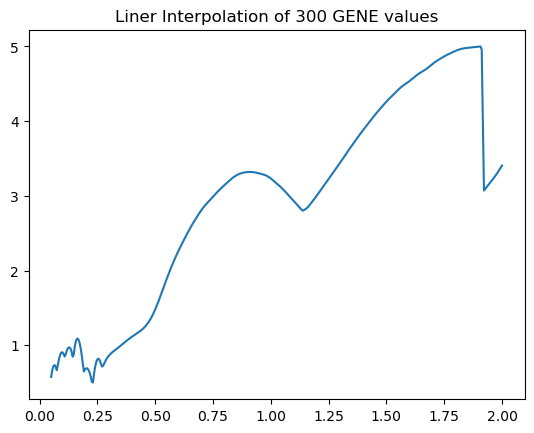

In [8]:
from GENE_ML.gene_ml.active_ml.oracles.mixing_length import MixingLength
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz

mx = MixingLength(dataset)

ky_pool = np.linspace(np.min(dataset.df['kymin1']), np.max(dataset.df['kymin1']), 400)
grothrate_labels = mx(ky_pool)

plt.plot(ky_pool, grothrate_labels)
plt.title(f'Liner Interpolation of {len(dataset.df)} GENE values')

true_integral = trapz(grothrate_labels, ky_pool)
print('true_integral',true_integral)

# Grid Baseline

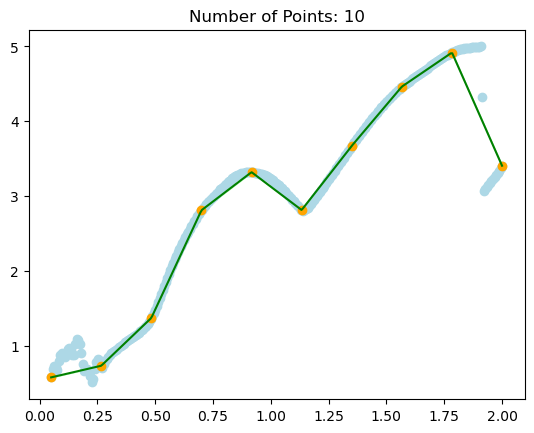

 /home/djdaniel/DEEPlasma/GENE_ML/gene_ml/active_ml/active_samplers/grid_baseline.py:50: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


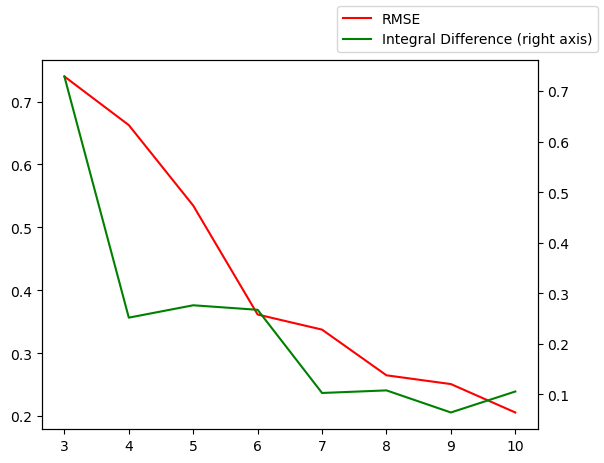

In [ ]:
from GENE_ML.gene_ml.active_ml.active_samplers.grid_baseline import GridBaseline
from GENE_ML.gene_ml.models.GPR import GPR
import numpy as np
from GENE_ML.gene_ml.models.INTERP_1D import Interp_1D

reg = Interp_1D(name='n')
grid_baseline = GridBaseline(mx, regressor=reg)
grid_baseline.generate_samples(num_samples = 10, X_range=(0.05,2), initial_X=None, initial_y=None, test_mode=True, plot_interval=10, integration_interval=1)



# sparceSpACE localy adaptive

split dimension 0
split dimension 0
Current number of function evaluations 5
combiintegral: 1.1529402082091371


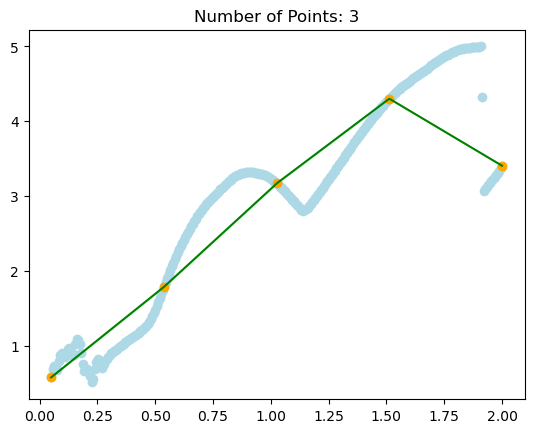

split dimension 0
split dimension 0
Current number of function evaluations 5
combiintegral: 1.1529402082091371
Finished refinement
Refined 1 times
Current number of function evaluations 6
combiintegral: 1.1563797691539728


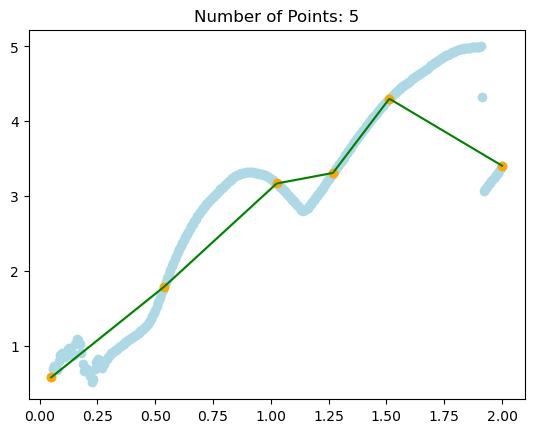

split dimension 0
split dimension 0
Current number of function evaluations 5
combiintegral: 1.1529402082091371
Finished refinement
Refined 1 times
Current number of function evaluations 6
combiintegral: 1.1563797691539728
Finished refinement
Refined 1 times
Current number of function evaluations 7
combiintegral: 1.1589166410275757
Finished refinement
Refined 1 times
Current number of function evaluations 8
combiintegral: 1.2178678311387707


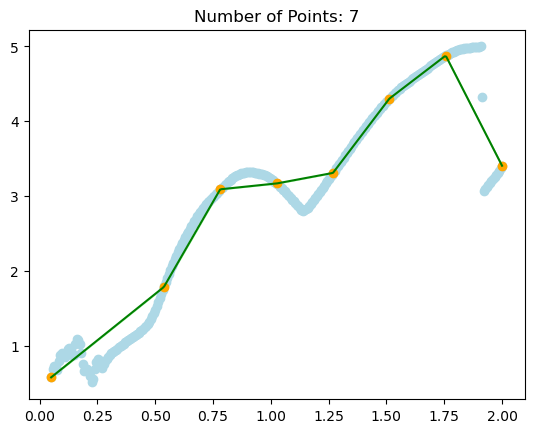

split dimension 0
split dimension 0
Current number of function evaluations 5
combiintegral: 1.1529402082091371
Finished refinement
Refined 1 times
Current number of function evaluations 6
combiintegral: 1.1563797691539728
Finished refinement
Refined 1 times
Current number of function evaluations 7
combiintegral: 1.1589166410275757
Finished refinement
Refined 1 times
Current number of function evaluations 8
combiintegral: 1.2178678311387707
Finished refinement
Refined 1 times
Current number of function evaluations 9
combiintegral: 1.221956562237593
Finished refinement
Refined 1 times
Current number of function evaluations 9
combiintegral: 1.221956562237593
Finished refinement
Refined 1 times
Current number of function evaluations 9
combiintegral: 1.221956562237593
Finished refinement
Refined 1 times
Current number of function evaluations 10
combiintegral: 1.222368559961397


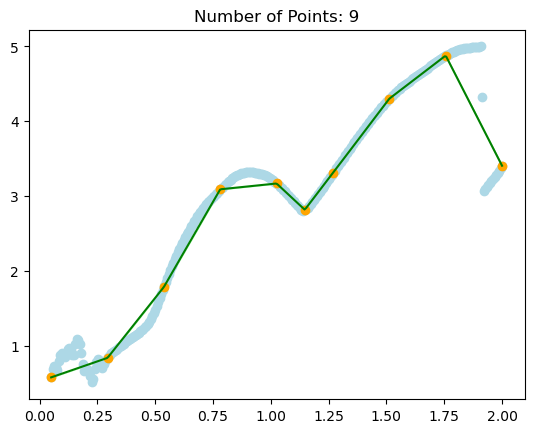

split dimension 0
split dimension 0
Current number of function evaluations 5
combiintegral: 1.1529402082091371
Finished refinement
Refined 1 times
Current number of function evaluations 6
combiintegral: 1.1563797691539728
Finished refinement
Refined 1 times
Current number of function evaluations 7
combiintegral: 1.1589166410275757
Finished refinement
Refined 1 times
Current number of function evaluations 8
combiintegral: 1.2178678311387707
Finished refinement
Refined 1 times
Current number of function evaluations 9
combiintegral: 1.221956562237593
Finished refinement
Refined 1 times
Current number of function evaluations 9
combiintegral: 1.221956562237593
Finished refinement
Refined 1 times
Current number of function evaluations 9
combiintegral: 1.221956562237593
Finished refinement
Refined 1 times
Current number of function evaluations 10
combiintegral: 1.222368559961397
Finished refinement
Refined 1 times
Current number of function evaluations 11
combiintegral: 1.2226454705419538
Fin

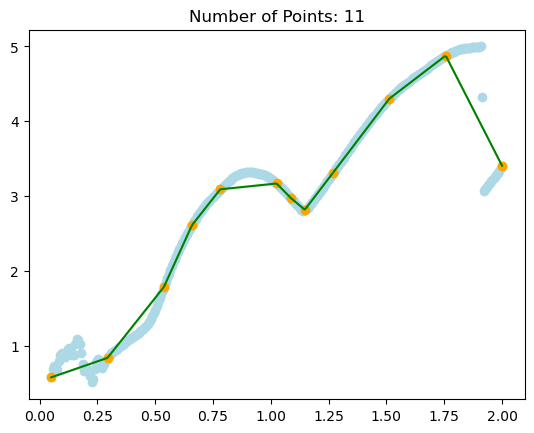

 /home/djdaniel/DEEPlasma/GENE_ML/gene_ml/active_ml/active_samplers/sparse_SpACE_1D.py:101: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


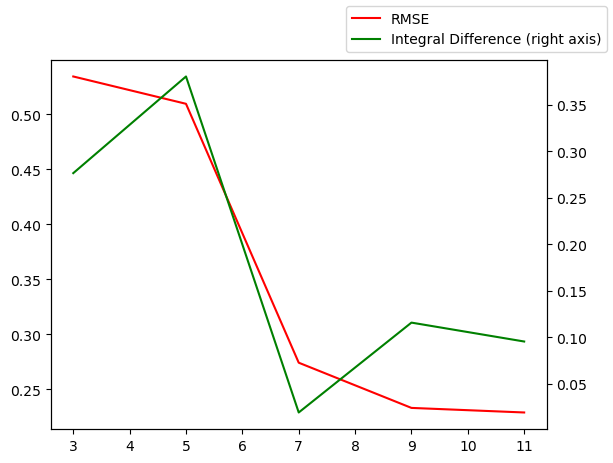

In [ ]:
from GENE_ML.gene_ml.active_ml.active_samplers.sparse_SpACE_1D import SparseSpACE_1D
from GENE_ML.gene_ml.models.GPR import GPR
import numpy as np
from GENE_ML.gene_ml.models.INTERP_1D import Interp_1D

reg = Interp_1D(name='n')
sparse_space = SparseSpACE_1D(mx, regressor=reg)
sparse_space.generate_samples(num_samples = 11, X_range=(0.05,2), initial_X=None, initial_y=None, test_mode=True, plot_interval=1, integration_interval=1)



# GPR, fixed kernel, highest uncertainty

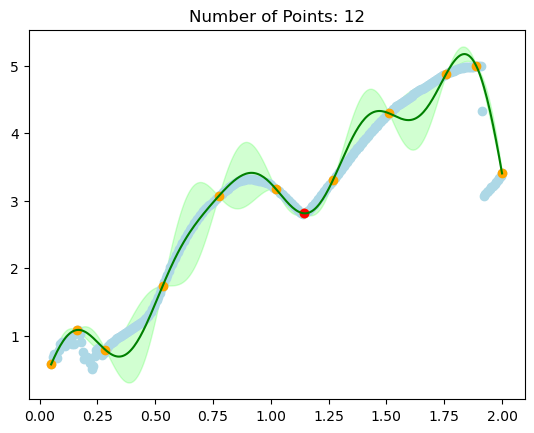

 /home/djdaniel/DEEPlasma/GENE_ML/gene_ml/active_ml/active_samplers/highest_uncertainty.py:54: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


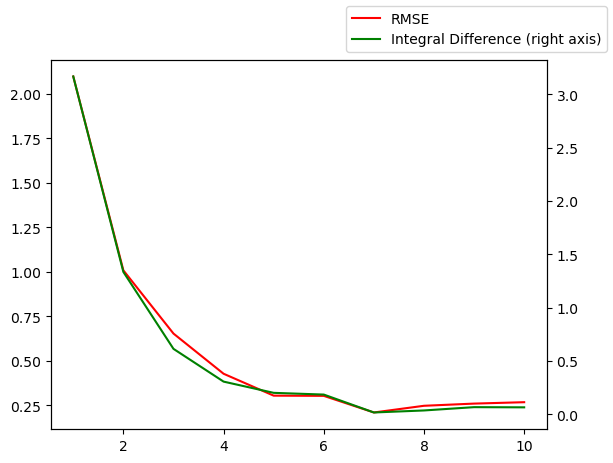

In [41]:
from GENE_ML.gene_ml.active_ml.active_samplers.highest_uncertainty import HighestUncertainty
from GENE_ML.gene_ml.models.GPR import GPR
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# Defining the kernel
kernel = C(5**2, (1e-4, 1e1)) * RBF(0.2, (1e-4, 1e1))
gp = GaussianProcessRegressor(kernel=kernel, optimizer=None)

reg = gp #GPR(name='n', dim=1, kernel_type='radial_basis_function', fixed_kernel_args={'lengthscale':1,'variance':5**2})
pool_X = np.linspace(0.05,2,300).reshape(-1,1)
initial_X = np.array([0.05, 2]).reshape(-1,1)
initial_y = mx(initial_X).reshape(-1,1)
gpr_hu = HighestUncertainty(mx, regressor=reg, random_state=42)
gpr_hu.generate_samples(num_samples = 10, pool_X=pool_X, initial_X=initial_X, initial_y=initial_y, test_mode=True, plot_interval=10, integration_interval=1)



# skactiveml GreedyX

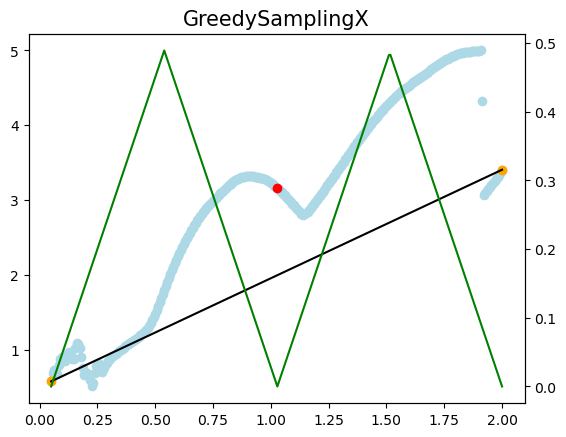

 /home/djdaniel/DEEPlasma/GENE_ML/gene_ml/active_ml/active_samplers/skactive_ml.py:89: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


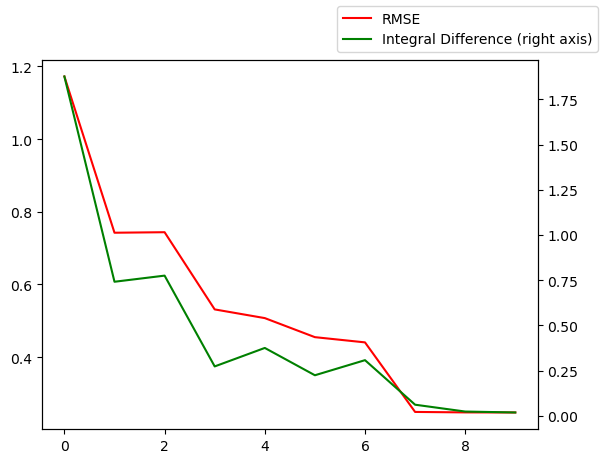

In [66]:
from GENE_ML.gene_ml.active_ml.active_samplers.skactive_ml import skActiveML
from GENE_ML.gene_ml.models.INTERP_1D import Interp_1D
# reg = NICKernelRegressor(metric_dict={'gamma': 15.0})
reg = Interp_1D(name='n')
pool_X = np.linspace(0.05,2,300)
initial_X = np.array([0.05, 2])
initial_y = mx(initial_X)
ska = skActiveML(mx, regressor=reg, random_state=42)
ska.generate_samples(num_samples = 10, pool_X=pool_X, initial_X=initial_X, initial_y=initial_y, test_mode=True, plot_interval=np.inf, integration_interval=1)



# Comparison



split dimension 0
split dimension 0
Current number of function evaluations 5
combiintegral: 1.1529402082091371
split dimension 0
split dimension 0
Current number of function evaluations 5
combiintegral: 1.1529402082091371
Finished refinement
Refined 1 times
Current number of function evaluations 6
combiintegral: 1.1563797691539728
split dimension 0
split dimension 0
Current number of function evaluations 5
combiintegral: 1.1529402082091371
Finished refinement
Refined 1 times
Current number of function evaluations 6
combiintegral: 1.1563797691539728
Finished refinement
Refined 1 times
Current number of function evaluations 7
combiintegral: 1.1589166410275757
Finished refinement
Refined 1 times
Current number of function evaluations 8
combiintegral: 1.2178678311387707
split dimension 0
split dimension 0
Current number of function evaluations 5
combiintegral: 1.1529402082091371
Finished refinement
Refined 1 times
Current number of function evaluations 6
combiintegral: 1.1563797691539728
F

 /tmp/ipykernel_769092/730286436.py:75: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


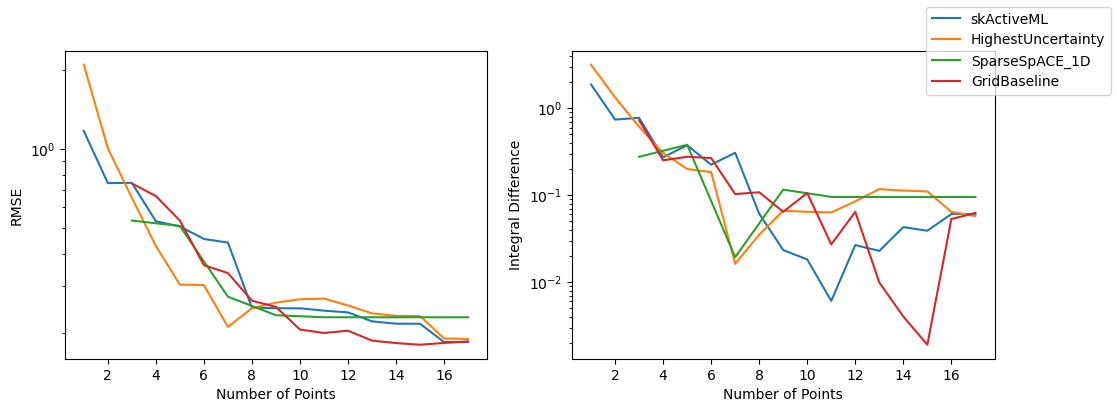

In [17]:
#Parameters
num_samples = 17
X_range = (0.05,2)
pool_X = np.linspace(0.05,2,300).reshape(-1,1)
initial_X = np.array([0.05, 2]).reshape(-1,1)
initial_y = mx(initial_X).reshape(-1,1)
plot_interval=None

#Grid
from GENE_ML.gene_ml.active_ml.active_samplers.grid_baseline import GridBaseline
from GENE_ML.gene_ml.models.GPR import GPR
import numpy as np
from GENE_ML.gene_ml.models.INTERP_1D import Interp_1D
reg = Interp_1D(name='n')
grid_baseline = GridBaseline(mx, regressor=reg)
grid_baseline.generate_samples(num_samples, X_range, initial_X=None, initial_y=None, test_mode=True, plot_interval=plot_interval, integration_interval=1)
#GPR
from GENE_ML.gene_ml.active_ml.active_samplers.highest_uncertainty import HighestUncertainty
from GENE_ML.gene_ml.models.GPR import GPR
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# Defining the kernel
kernel = C(5**2, (1e-4, 1e1)) * RBF(0.2, (1e-4, 1e1))
gp = GaussianProcessRegressor(kernel=kernel, optimizer=None)
reg = gp #GPR(name='n', dim=1, kernel_type='radial_basis_function', fixed_kernel_args={'lengthscale':1,'variance':5**2})
gpr_hu = HighestUncertainty(mx, regressor=reg, random_state=42)
gpr_hu.generate_samples(num_samples, pool_X, initial_X, initial_y, test_mode=True, plot_interval=plot_interval, integration_interval=1)

#SKL
from GENE_ML.gene_ml.active_ml.active_samplers.skactive_ml import skActiveML
from GENE_ML.gene_ml.models.INTERP_1D import Interp_1D
pool_X = np.linspace(0.05,2,300)
initial_X = np.array([0.05, 2])
initial_y = mx(initial_X)
reg = Interp_1D(name='n')
ska = skActiveML(mx, regressor=reg, random_state=42)
ska.generate_samples(num_samples, pool_X, initial_X, initial_y, test_mode=True, plot_interval=plot_interval, integration_interval=1)

#SparseSpACE
from GENE_ML.gene_ml.active_ml.active_samplers.sparse_SpACE_1D import SparseSpACE_1D
from GENE_ML.gene_ml.models.GPR import GPR
import numpy as np
from GENE_ML.gene_ml.models.INTERP_1D import Interp_1D
reg = Interp_1D(name='n')
sparse_space = SparseSpACE_1D(mx, regressor=reg)
sparse_space.generate_samples(num_samples, X_range, test_mode=True, plot_interval=plot_interval, integration_interval=1)

#Plot
actives = [ska, gpr_hu, sparse_space, grid_baseline]

ncol = 2
nrow = 1
scale = 2
width = 3*scale
height = 2*scale
fig, [ax1,ax2] = plt.subplots(nrow,ncol, figsize = (ncol*width,nrow*height))
for act in actives:
    if act.__class__.__name__ == 'GridBaseline':
        print('ns', num_samples)
        n_points = np.arange(3,num_samples+1)
    elif act.__class__.__name__=='SparseSpACE_1D':
        n_points = np.arange(3,num_samples+1,2)
    else:
        n_points = np.arange(1,num_samples+1)
    ax1.plot(n_points,act.rmse_s, label=act.__class__.__name__)
    ax1.set_xlabel('Number of Points')
    ax1.set_ylabel('RMSE') 
    ax1.set_yscale('log')
    ax2.plot(n_points,act.integrals_dif)
    ax2.set_xlabel('Number of Points')
    ax2.set_ylabel('Integral Difference')
    ax2.set_yscale('log')
fig.legend()
fig.show()

In [116]:
n_points = np.arange(3,num_samples+1)
print(len(n_points))

9


In [61]:
print(type(grid_baseline.__class__.__name__))

<class 'str'>


# Other

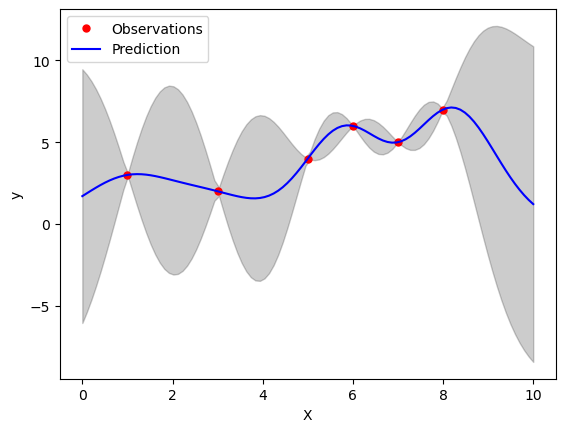

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Generating sample data
X = np.array([[1], [3], [5], [6], [7], [8]]).astype(float)
y = np.array([3, 2, 4, 6, 5, 7]).astype(float)

# Defining the kernel
kernel = C(5**2, (1e-4, 1e1)) * RBF(1, (1e-4, 1e1))

# Creating the GaussianProcessRegressor object
gp = GaussianProcessRegressor(kernel=kernel, optimizer=None)

# Fitting to the data
gp.fit(X, y)

# Making predictions
X_pred = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred, sigma = gp.predict(X_pred, return_std=True)

# Plotting the results
plt.figure()
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(X_pred, y_pred, 'b-', label='Prediction')
plt.fill_between(X_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='k')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()


In [53]:
# reg.fit(initial_X,initial_y)
reg = Interp_1D(name='n')
x = np.array([0.05, 0.0696969696969697, 0.08939393939393939, 0.10909090909090909, 0.12878787878787878, 0.1484848484848485, 0.16818181818181815, 0.18787878787878787, 0.20757575757575758, 0.22727272727272724, 0.24696969696969695, 0.26666666666666666, 0.2863636363636363, 0.30606060606060603, 0.32575757575757575, 0.3454545454545454, 0.3651515151515151, 0.38484848484848483, 0.4045454545454545, 0.4242424242424242, 0.4439393939393939, 0.46363636363636357, 0.4833333333333333, 0.503030303030303, 0.5227272727272727, 0.5424242424242424, 0.5621212121212121, 0.5818181818181818, 0.6015151515151516, 0.6212121212121212, 0.6409090909090909, 0.6606060606060606, 0.6803030303030303, 0.7, 0.7196969696969697, 0.7393939393939394, 0.759090909090909, 0.7787878787878788, 0.7984848484848485, 0.8181818181818181, 0.8378787878787879, 0.8575757575757575, 0.8772727272727272, 0.896969696969697, 0.9166666666666666, 0.9363636363636363, 0.956060606060606, 0.9757575757575757, 0.9954545454545454, 1.0151515151515151, 1.0348484848484847, 1.0545454545454545, 1.0742424242424242, 1.093939393939394, 1.1136363636363635, 1.1333333333333333, 1.153030303030303, 1.1727272727272726, 1.1924242424242424])
print(reg.predict(x))

TypeError: 'NoneType' object is not callable

GreedySamplingTarget:- integral:0.0,  true integral:5.758054958086533,  difference: 5.758054958086533
QueryByCommittee:- integral:0.0,  true integral:5.758054958086533,  difference: 5.758054958086533
n_samples so far 1


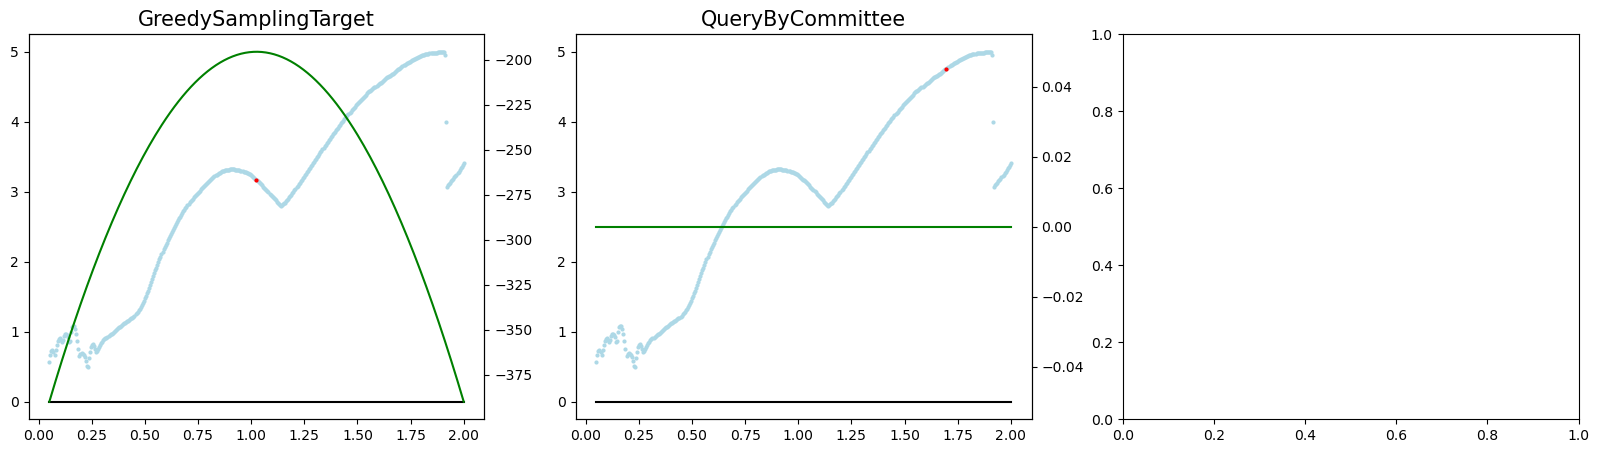

GreedySamplingTarget:- integral:3.4873742876272726,  true integral:5.758054958086533,  difference: 2.2706806704592606
QueryByCommittee:- integral:4.99013404704086,  true integral:5.758054958086533,  difference: 0.7679209110456728
n_samples so far 3


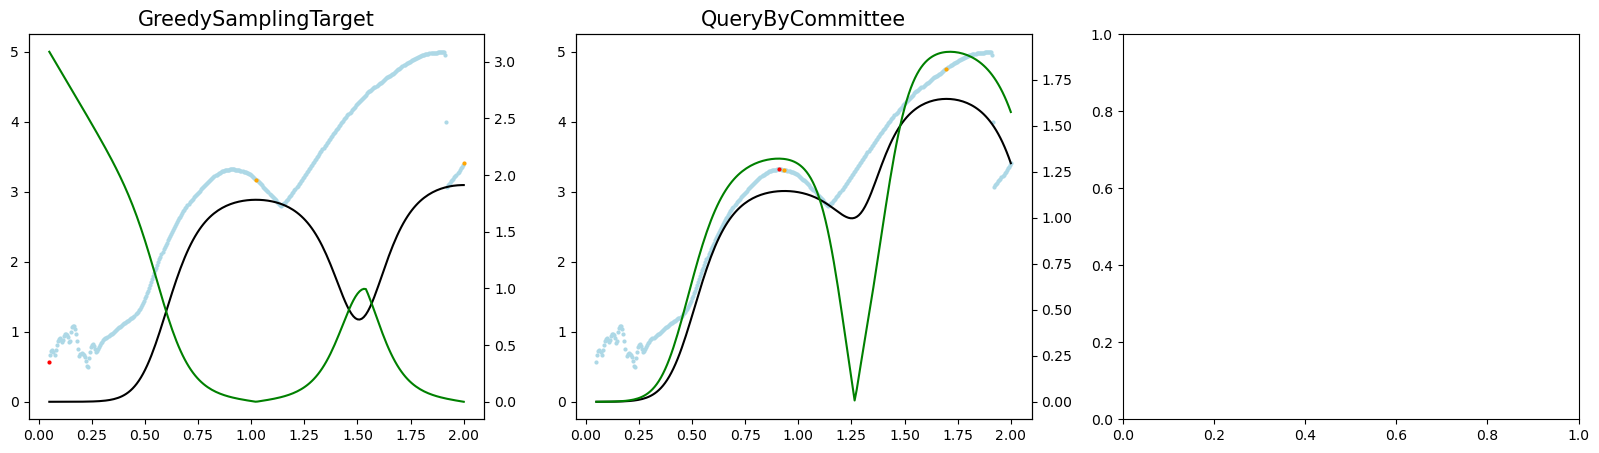

loggrid:- integral:5.7083360576733,  true integral:5.758054958086533,  difference: 0.049718900413233236
GreedySamplingTarget:- integral:5.430584752724613,  true integral:5.758054958086533,  difference: 0.3274702053619203
QueryByCommittee:- integral:2.4572093884641597,  true integral:5.758054958086533,  difference: 3.3008455696223735
n_samples so far 5


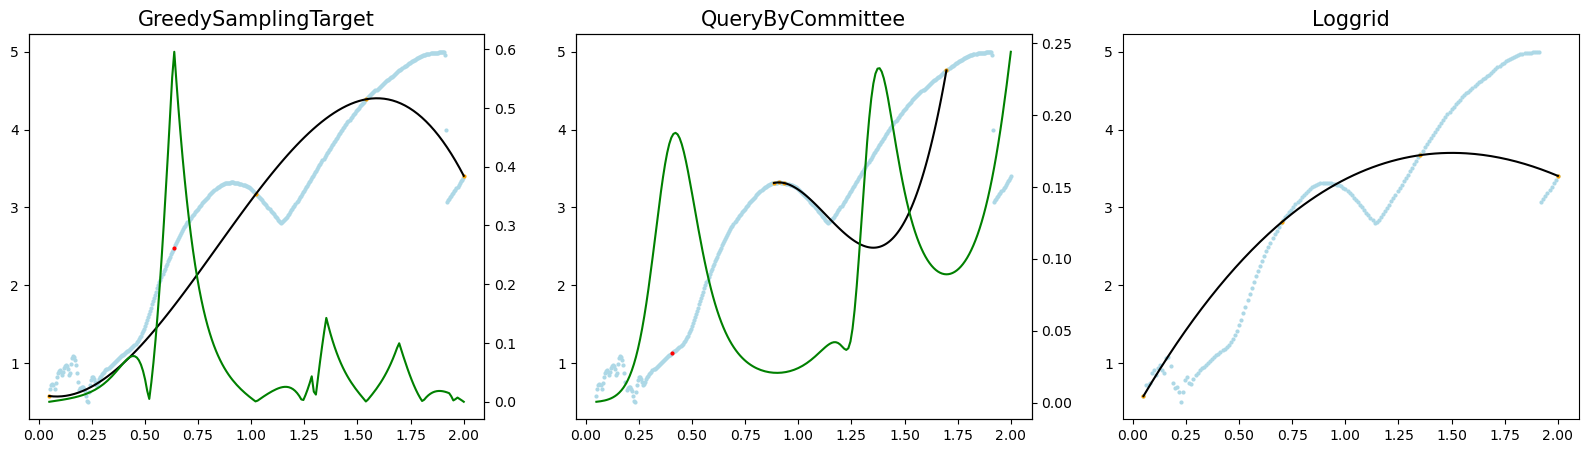

loggrid:- integral:5.576253358643676,  true integral:5.758054958086533,  difference: 0.18180159944285723
GreedySamplingTarget:- integral:5.67820318002316,  true integral:5.758054958086533,  difference: 0.0798517780633734
QueryByCommittee:- integral:4.374223304925041,  true integral:5.758054958086533,  difference: 1.3838316531614918
n_samples so far 7


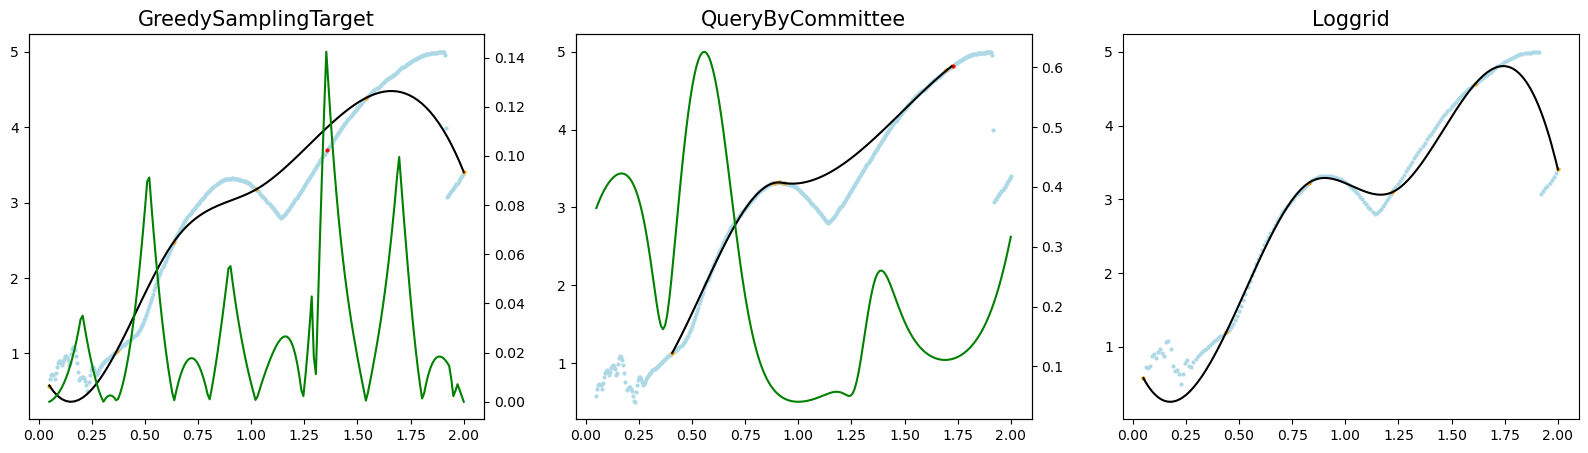

loggrid:- integral:5.705042153700133,  true integral:5.758054958086533,  difference: 0.05301280438639999
GreedySamplingTarget:- integral:5.800339652455278,  true integral:5.758054958086533,  difference: 0.04228469436874516
QueryByCommittee:- integral:4.397460535371172,  true integral:5.758054958086533,  difference: 1.3605944227153612
n_samples so far 9


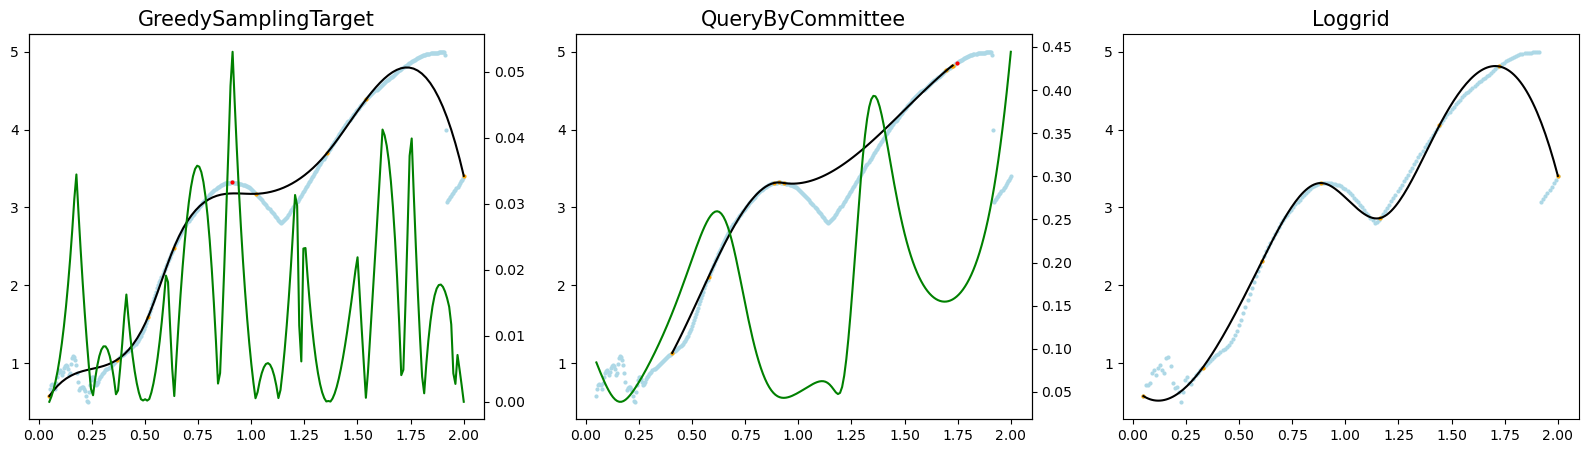

loggrid:- integral:5.713227104645756,  true integral:5.758054958086533,  difference: 0.04482785344077733
GreedySamplingTarget:- integral:5.791931581793011,  true integral:5.758054958086533,  difference: 0.033876623706477815
QueryByCommittee:- integral:4.699831851935368,  true integral:5.758054958086533,  difference: 1.058223106151165
n_samples so far 11


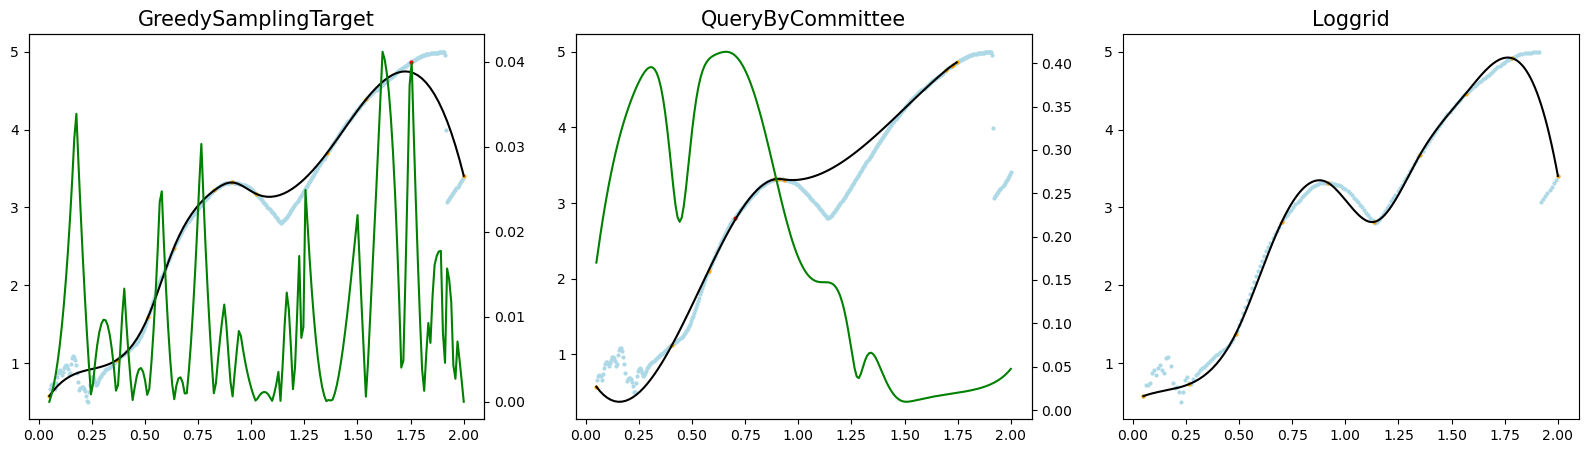

loggrid:- integral:5.73239730639492,  true integral:5.758054958086533,  difference: 0.02565765169161338
GreedySamplingTarget:- integral:5.888041103439628,  true integral:5.758054958086533,  difference: 0.1299861453530946
QueryByCommittee:- integral:4.913057964244031,  true integral:5.758054958086533,  difference: 0.8449969938425026
n_samples so far 13


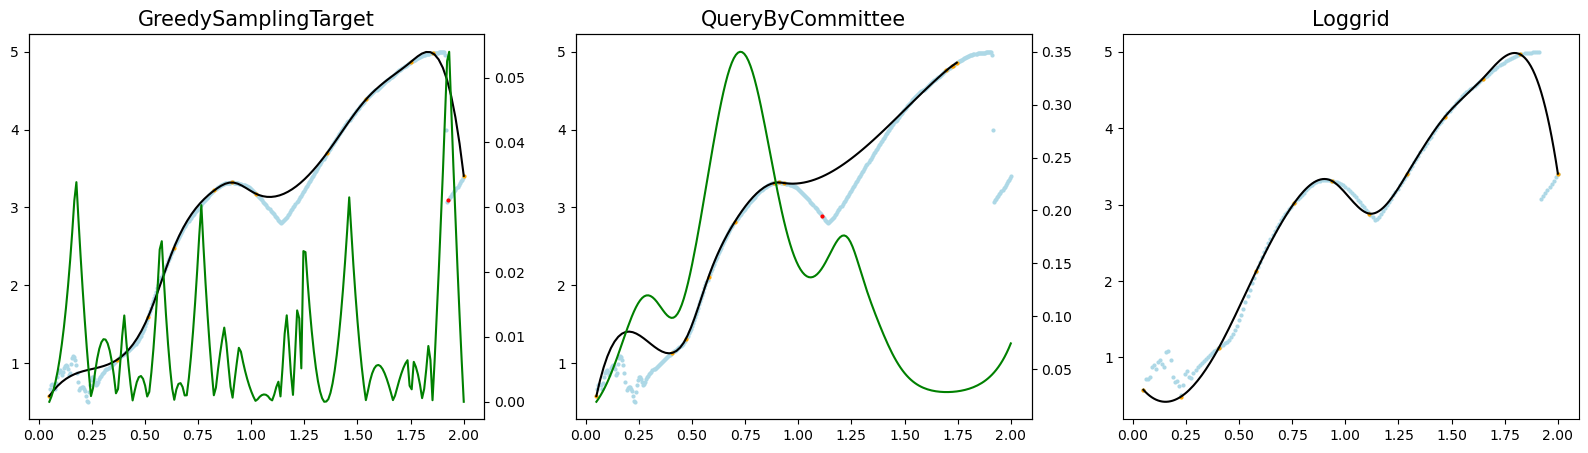

loggrid:- integral:5.791806190166623,  true integral:5.758054958086533,  difference: 0.0337512320800899
GreedySamplingTarget:- integral:5.752492248109621,  true integral:5.758054958086533,  difference: 0.005562709976912217
QueryByCommittee:- integral:4.760236987502487,  true integral:5.758054958086533,  difference: 0.9978179705840464
n_samples so far 15


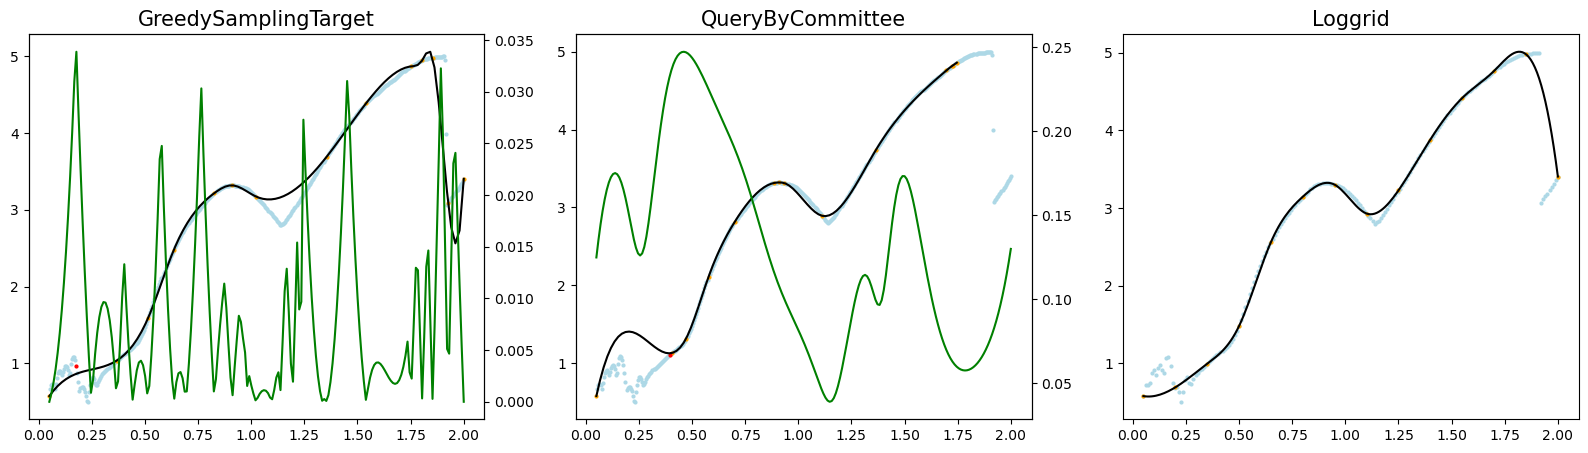

loggrid:- integral:5.851979645674772,  true integral:5.758054958086533,  difference: 0.09392468758823913
GreedySamplingTarget:- integral:5.7389180323090585,  true integral:5.758054958086533,  difference: 0.019136925777474723
QueryByCommittee:- integral:4.58369501179278,  true integral:5.758054958086533,  difference: 1.1743599462937535
n_samples so far 17


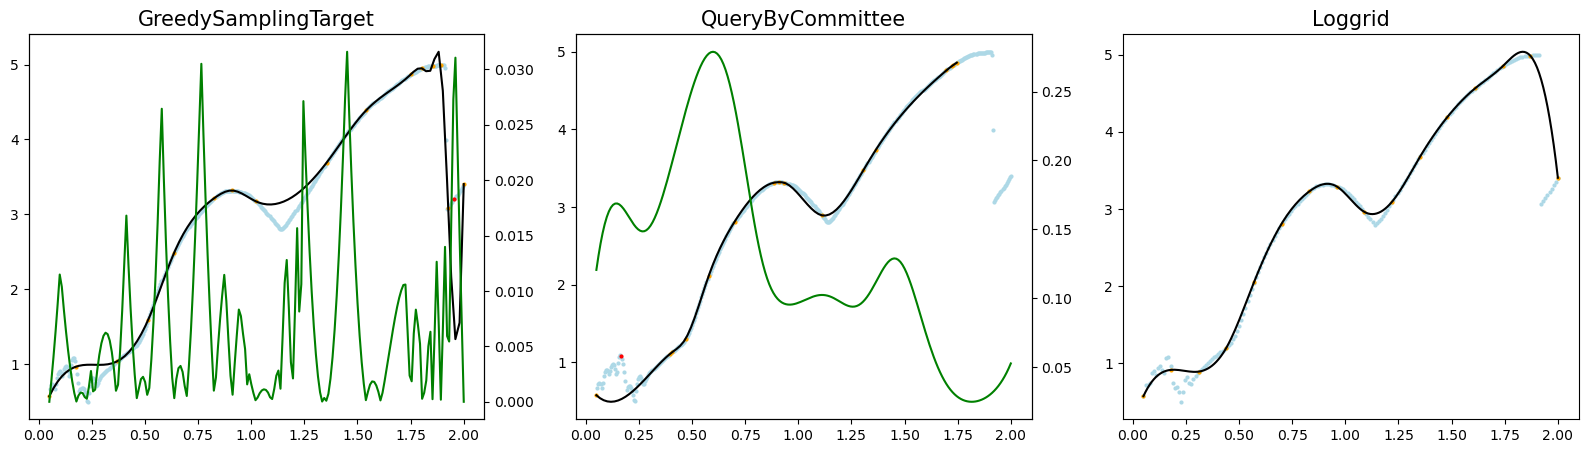

loggrid:- integral:5.873588624355477,  true integral:5.758054958086533,  difference: 0.11553366626894412
GreedySamplingTarget:- integral:5.830560065686163,  true integral:5.758054958086533,  difference: 0.07250510759963014
QueryByCommittee:- integral:5.856652390726699,  true integral:5.758054958086533,  difference: 0.09859743264016618
n_samples so far 19


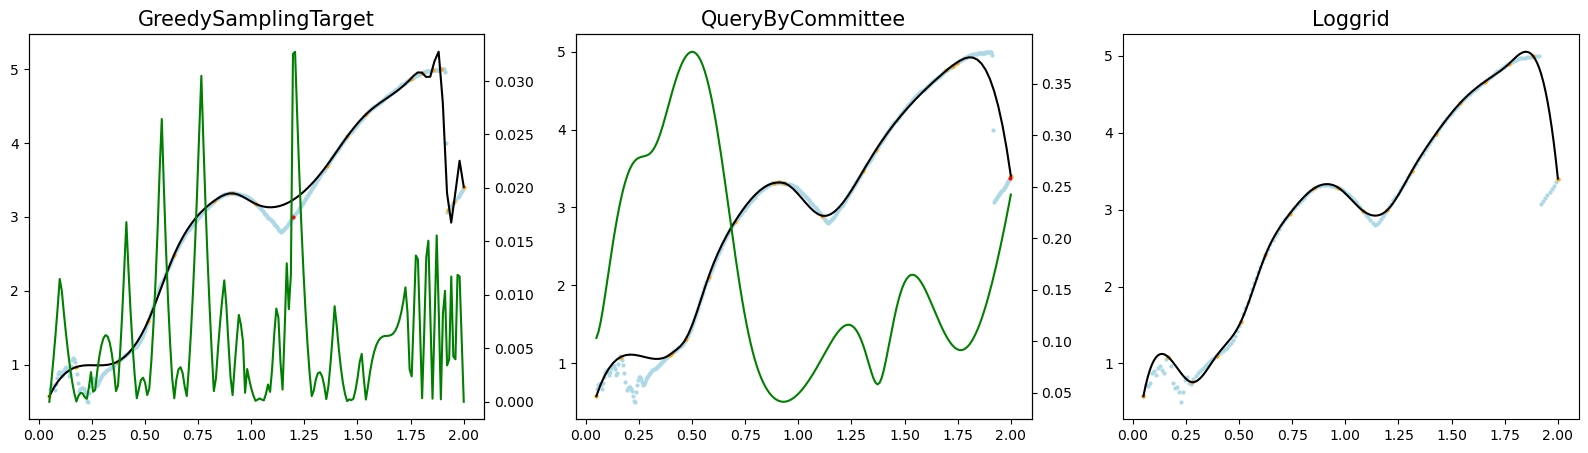

In [32]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

from skactiveml.pool import GreedySamplingX, GreedySamplingTarget, QueryByCommittee, \
    KLDivergenceMaximization
from sklearn.ensemble import BaggingRegressor
from skactiveml.regressor import NICKernelRegressor, SklearnRegressor
from skactiveml.utils import call_func, is_labeled
from scipy.stats import norm, uniform
from scipy.integrate import trapz
from scipy.interpolate import interp1d

# mlp.rcParams["figure.facecolor"] = "white"

random_state = 0
n_iterations = 20

true_function, X, noise = mx.get_label, ky_pool, 0 # select another data set here
X = X.reshape(-1, 1)
y_true = true_function(X)
X_test = np.linspace(0.05, 2, num=200).reshape(-1, 1)
X_test2 = np.linspace(0.05, 2, num=200).reshape(-1, 1)

Y_test = true_function(X_test)



qs_s = [
    # GreedySamplingX(random_state=random_state),
    GreedySamplingTarget(random_state=random_state),
    QueryByCommittee(random_state=random_state),
    # KLDivergenceMaximization(
    #     random_state=random_state,
    #     integration_dict_target_val={
    #         "method": "assume_linear",
    #         "n_integration_samples": 3,
    #     },
    #     integration_dict_cross_entropy={
    #         "method": "assume_linear",
    #         "n_integration_samples": 3,
    #     }
    # ),
]

rmse_s = {qs.__class__.__name__: [] for qs in qs_s}
rmse_s['loggrid'] = []
integral_difference_s = {qs.__class__.__name__: [] for qs in qs_s}
integral_difference_s['loggrid']=[]

y = np.full_like(y_true, np.nan)
y_s = [y.copy() for _ in range(len(qs_s))]

reg = NICKernelRegressor(metric_dict={'gamma': 15.0})
plot_interval = 2
for i in range(n_iterations):
    if i%plot_interval==0:        
        fig, axes = plt.subplots(1, len(qs_s)+1, figsize=(20, 5))
        axes = [axes, ] if len(qs_s)==1 else axes
    
        #loggrid
        ax_loggrid = axes[-1]
        axes = axes[0:-1]
    if i > 3:
        log_values = np.logspace(0, 1, num=i)
        # Normalize the values to range from 0 to 2
        ky_loggrid = np.linspace(0.05,2,i)#(log_values - log_values.min()) / (log_values.max() - log_values.min()) * (2 - 0.05) + 0.05 
        # ky_loggrid = ky_loggrid.reshape(-1, 1)
        y_loggrid = true_function(ky_loggrid)
        interpolation = interp1d(ky_loggrid, y_loggrid, kind='cubic')
        y_pred = interpolation(X_test.flatten())
        
        integral = trapz(y_pred, X_test.flatten())
        integral_difference_s['loggrid'].append(np.abs(true_integral-integral))
            
        rmse = np.sqrt(np.mean((y_pred-Y_test.flatten())**2))
        rmse_s['loggrid'].append(rmse)

        if i%plot_interval==0:
            print(f'{'loggrid'}:- integral:{integral},  true integral:{true_integral},  difference: {np.abs(true_integral-integral)}')
            marker_size = 4
            ax_loggrid.scatter(X_test, Y_test, c='lightblue', s=marker_size)
            ax_loggrid.scatter(ky_loggrid, y_loggrid, c='orange',s=marker_size)
            ax_loggrid.plot(X_test, y_pred, c='black')
            ax_loggrid.set_title('Loggrid', fontdict={'fontsize': 15})

    

    for qs, ax, y in zip(qs_s, axes, y_s):
        if i>3:
            interpolation = interp1d(X[~np.isnan(y)].flatten(), y[~np.isnan(y)].flatten(), kind='cubic')
            X_interp = np.linspace(X[~np.isnan(y)].min(), X[~np.isnan(y)].max(), 100)
            y_interp = interpolation(X_interp)
        reg.fit(X, y)
        # print('debug', X.flatten().shape, y.shape)
        # print('debug2',X,y, X[~np.isnan(y)].flatten().shape, y[~np.isnan(y)].flatten().shape)
        
        # def dummy_pred(X, return_std):
        #     if return_std:
        #         return interpolation(X.flatten()), 0
        #     else:
        #         return interpolation(X.flatten())
        # reg.predict=dummy_pred 
        indices, utils = call_func(qs.query,
            X=X,
            y=y,
            reg=reg,
            ensemble=SklearnRegressor(BaggingRegressor(reg, n_estimators=4)),
            fit_reg=True,
            return_utilities=True,
        )
        _, utilities_test = call_func(qs.query,
            X=X,
            y=y,
            reg=reg,
            ensemble=SklearnRegressor(BaggingRegressor(reg, n_estimators=4)),
            candidates=X_test,
            fit_reg=True,
            return_utilities=True,
        )

        y_pred, y_std = reg.predict(X_test, return_std=True)
        if i>3:
            integral = trapz(y_interp.flatten(), X_interp.flatten())
            integral_difference_s[qs.__class__.__name__].append(np.abs(true_integral-integral))
            rmse = np.sqrt(np.mean((y_interp-Y_test)**2))
            rmse_s[qs.__class__.__name__].append(rmse)
        else:
            integral = trapz(y_pred.flatten(), X_test.flatten())
            integral_difference_s[qs.__class__.__name__].append(np.abs(true_integral-integral))
            rmse = np.sqrt(np.mean((y_pred-Y_test)**2))
            rmse_s[qs.__class__.__name__].append(rmse)

        old_is_lbld = is_labeled(y)
        y[indices] = y_true[indices]
        is_lbld = is_labeled(y)
        if i%plot_interval==0:
            print(f'{qs.__class__.__name__}:- integral:{integral},  true integral:{true_integral},  difference: {np.abs(true_integral-integral)}')
            ax_t = ax.twinx()
            ax_t.plot(X_test, utilities_test.flatten(), c='green')
            marker_size = 4
            ax.scatter(X[~is_lbld], y_true[~is_lbld], c='lightblue', s=marker_size)
            ax.scatter(X[old_is_lbld], y[old_is_lbld], c='orange',s=marker_size)
            ax.scatter(X[indices], y[indices], c='red',s=marker_size)
            if i>3: ax.plot(X_interp, y_interp, c='black')
            else:ax.plot(X_test, y_pred, c='black')
        # if i == 0:
            ax.set_title(qs.__class__.__name__, fontdict={'fontsize': 15})
        
    if i%plot_interval==0:
        print(f"n_samples so far {len(X[is_lbld])}")
        plt.show()

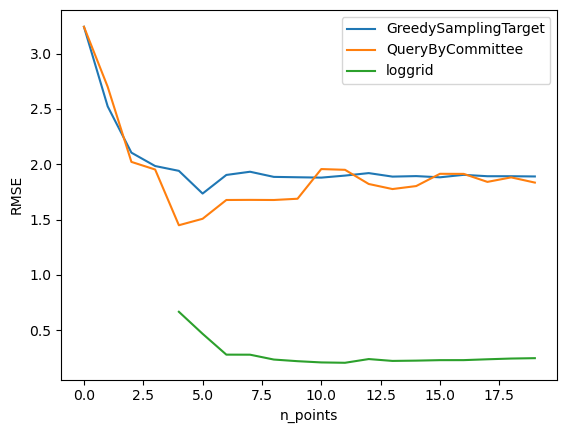

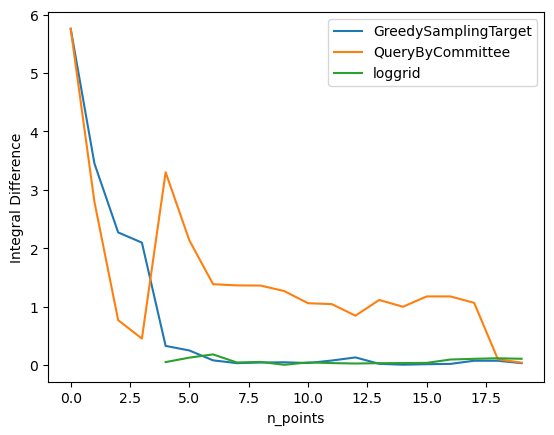

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure()
names = [qs.__class__.__name__ for qs in qs_s] + ['loggrid'] 
itteration = np.arange(n_iterations)
for name in names:
    if name=='loggrid':
        itteration = itteration[4:]
    plt.plot(itteration, rmse_s[name], label=name)
plt.ylabel('RMSE')
plt.xlabel('n_points')
plt.legend()
plt.show()    

fig = plt.figure()
names = [qs.__class__.__name__ for qs in qs_s] + ['loggrid'] 
itteration = np.arange(n_iterations)
for name in names:
    if name=='loggrid':
        itteration = itteration[4:]
    plt.plot(itteration, integral_difference_s[name], label=name)
plt.ylabel('Integral Difference')
plt.xlabel('n_points')
plt.legend()
plt.show()    

# Sklearn tutorial

In [22]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

from skactiveml.pool import GreedySamplingX, GreedySamplingTarget, QueryByCommittee, \
    KLDivergenceMaximization
from sklearn.ensemble import BaggingRegressor
from skactiveml.regressor import NICKernelRegressor, SklearnRegressor
from skactiveml.utils import call_func, is_labeled
from scipy.stats import norm, uniform

# mlp.rcParams["figure.facecolor"] = "white"

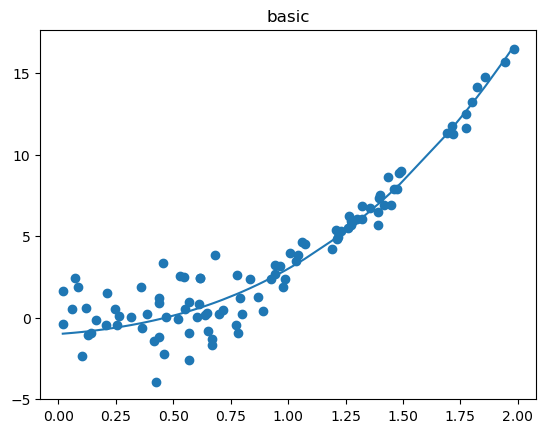

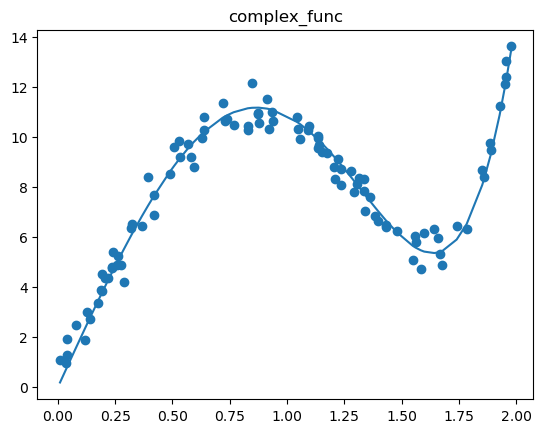

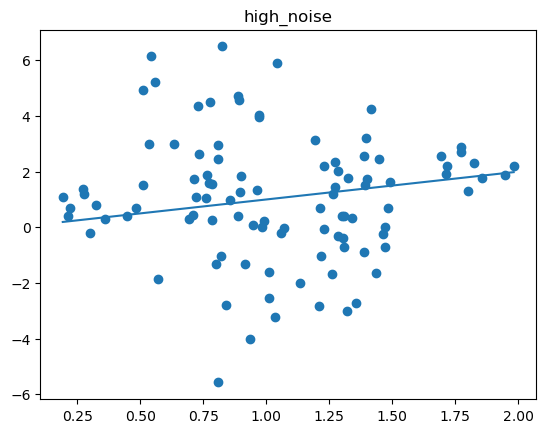

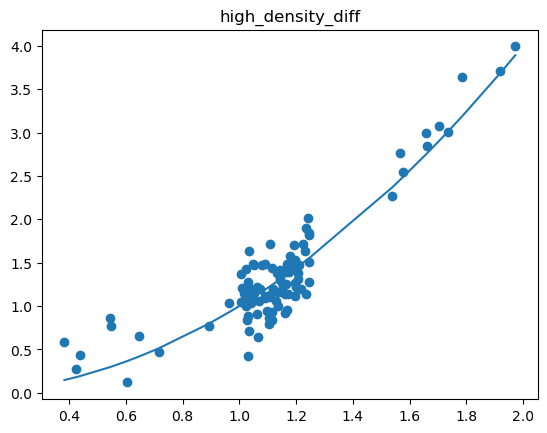

In [23]:
random_state = 0
n_iterations = 8

def uniform_rvs(*pos_args, **key_word_args):
    return uniform.rvs(*pos_args, **key_word_args, random_state=random_state)

def norm_rvs(*pos_args, **key_word_args):
    return norm.rvs(*pos_args, **key_word_args, random_state=random_state)

settings = {
    'basic': (
        lambda X_: (X_**3 + 2*X_**2 + X_ - 1).flatten(),
        np.sort(np.concatenate((uniform_rvs(0, 1, 60),uniform_rvs(1, 0.5, 30), uniform_rvs(1.5, 0.5, 10)))),
        np.concatenate((norm_rvs(0, 1.5, 60), norm_rvs(0, 0.5, 40)))
    ),
    'complex_func': (
        lambda X_: (6/7*X_**6 - 10*X_**3 + 20*X_).flatten(),
        np.sort(uniform_rvs(0, 2, 100)),
        norm_rvs(0, 0.5, 100)
    ),
    'high_noise': (
        lambda X_: X_.flatten(),
        np.sort(np.concatenate(tuple(uniform_rvs(s, 0.5, n) for s, n in [(0, 10), (0.5, 40), (1.0, 40), (1.5, 10)]))),
        np.concatenate(tuple(norm_rvs(0, std, n) for std, n in [(0.5, 10), (2.5, 80), (0.5, 10)]))
    ),
    'high_density_diff': (
        lambda X_: (X_**2).flatten(),
        np.sort(np.concatenate((uniform_rvs(0, 1, 10), uniform_rvs(1, 0.25, 80), uniform_rvs(1.25, 0.75, 10)))),
        norm_rvs(0, 0.25, 100)
    )
}

for variant in ['basic', 'complex_func', 'high_noise', 'high_density_diff']:
    true_function, X, noise = settings[variant]
    X = X.reshape(-1, 1)
    y_true = true_function(X) + noise
    X_test = np.linspace(0, 2, num=200).reshape(-1, 1)

    plt.title(variant)
    plt.scatter(X, y_true)
    plt.plot(X, true_function(X))
    plt.show()

[0.042197484524583086, 0.041942441567948574, 0.04151851120244332, 0.040927400446025636, 0.04017148949308278, 0.039253822130228176, 0.03817809348004705, 0.03694863512214197, 0.03557039765139056, 0.03404893074364723, 0.03239036080915721, 0.030601366323664687, 0.028689150936548263, 0.02666141446426747, 0.02452632188591919, 0.02229247046574878, 0.019968855135001313, 0.017564832272508196, 0.015090082029851848, 0.012554569352811665, 0.009968503856044716, 0.007342298712570823, 0.004686528723599981, 0.0020118877375403152, -0.0006708544103551928, -0.003350895264314128, -0.006017443245721214, -0.00865976110699688, -0.011267209166703429, -0.013829288151786892, -0.016335681474444197, -0.018776296773380958, -0.021141306552188155, -0.023421187751202166, -0.025606760093504377, -0.027689223050656426, -0.02966019127932218, -0.03151172838608588, -0.03323637888450696, -0.034827198215732914, -0.03627778071178678, -0.0375822853889309, -0.03873545946724721, -0.03973265952172798, -0.04056987017970936, -0.041

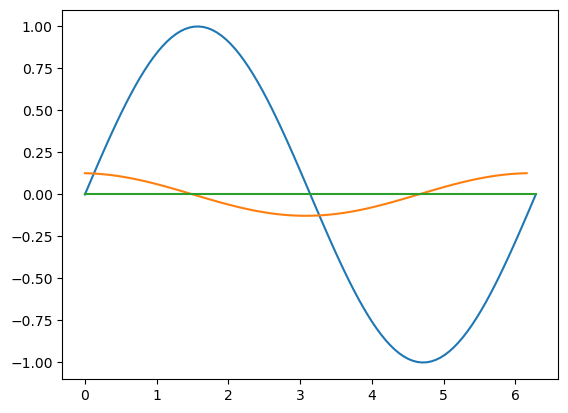

[0.08371599572702641, 0.08169000069552611, 0.07834958297312983, 0.07374849113143761, 0.06796075846054778, 0.06107951174570547, 0.05321547282246745, 0.044495177020920505, 0.035058937164853164, 0.025058585885896562, 0.014655032579644697, 0.004015674313244788, -0.006688297656076407, -0.017284652412424644, -0.027602890641147626, -0.03747698802663235, -0.04674806664569253, -0.055266951372826556, -0.06289657016382914, -0.06951415959629374, -0.07501324017903399, -0.07930532964695657, -0.08232136667382882, -0.08401282209486956, -0.08435247975917752, -0.08333487444778732, -0.08097637981108789, -0.07731494491065886, -0.07240948360466383, -0.06633892660181884, -0.059200951436742276, -0.05111041080185863, -0.042197484524583086, -0.032605584925167776, -0.022489049258783773, -0.012010656371310971, -0.0013390075267738129, 0.009354186450111138, 0.01989686806538245, 0.030119401625319897, 0.039857302738256974, 0.048953884930016255, 0.05726278078793209, 0.06465029706731192, 0.07099756586578922, 0.0762024

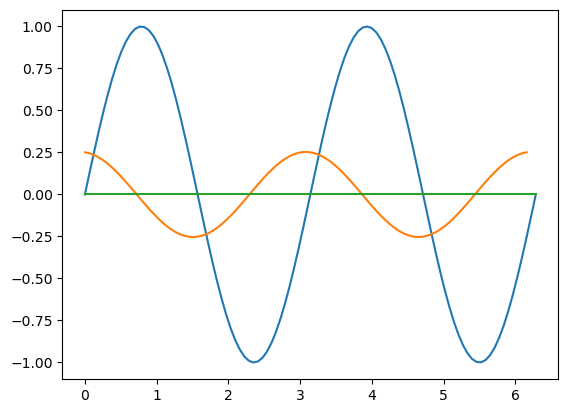

[0.1976359763515468, 0.16751416878394954, 0.12066477079647782, 0.06176605854117978, -0.0033004742431351395, -0.06803742904768102, -0.12598031828396586, -0.1713430945631341, -0.19959593245361276, -0.20791756672236614, -0.19547701757417926, -0.1635165704363677, -0.11522772411311229, -0.055432494849412074, 0.009898099431611795, 0.07424029163041694, 0.13116901426983643, 0.1749994923702259, 0.20135491237072048, 0.20760348094713565, 0.1931212300099917, 0.1593543247630622, 0.10967465287900087, 0.049043115334142705, -0.01648575807298695, -0.08036840053256138, -0.13622563417705838, -0.17847968052257235, -0.20291114495919618, -0.20708035606438516, -0.1905709857373695, -0.1550316227926084, -0.1040111485661624, -0.042604353558938136, 0.023056816953420062, 0.08641558526790709, 0.14114508641801643, 0.1817801547657076, 0.2042630632247391, 0.20634871881652708, 0.18782885263612129, 0.15055281711947038, 0.0982429138433653, 0.03612269281111676, -0.029604659573623904, -0.09237575683402317, -0.145922417521

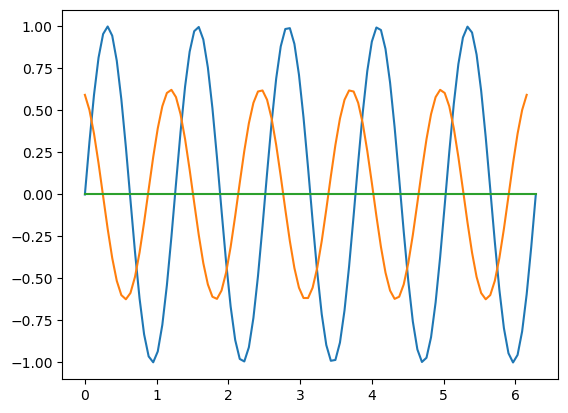

[0.1976359763515468, 0.16751416878394954, 0.12066477079647782, 0.06176605854117978, -0.0033004742431351395, -0.06803742904768102, -0.12598031828396586, -0.1713430945631341, -0.19959593245361276, -0.20791756672236614, -0.19547701757417926, -0.1635165704363677, -0.11522772411311229, -0.055432494849412074, 0.009898099431611795, 0.07424029163041694, 0.13116901426983643, 0.1749994923702259, 0.20135491237072048, 0.20760348094713565, 0.1931212300099917, 0.1593543247630622, 0.10967465287900087, 0.049043115334142705, -0.01648575807298695, -0.08036840053256138, -0.13622563417705838, -0.17847968052257235, -0.20291114495919618, -0.20708035606438516, -0.1905709857373695, -0.1550316227926084, -0.1040111485661624, -0.042604353558938136, 0.023056816953420062, 0.08641558526790709, 0.14114508641801643, 0.1817801547657076, 0.2042630632247391, 0.20634871881652708, 0.18782885263612129, 0.15055281711947038, 0.0982429138433653, 0.03612269281111676, -0.029604659573623904, -0.09237575683402317, -0.145922417521

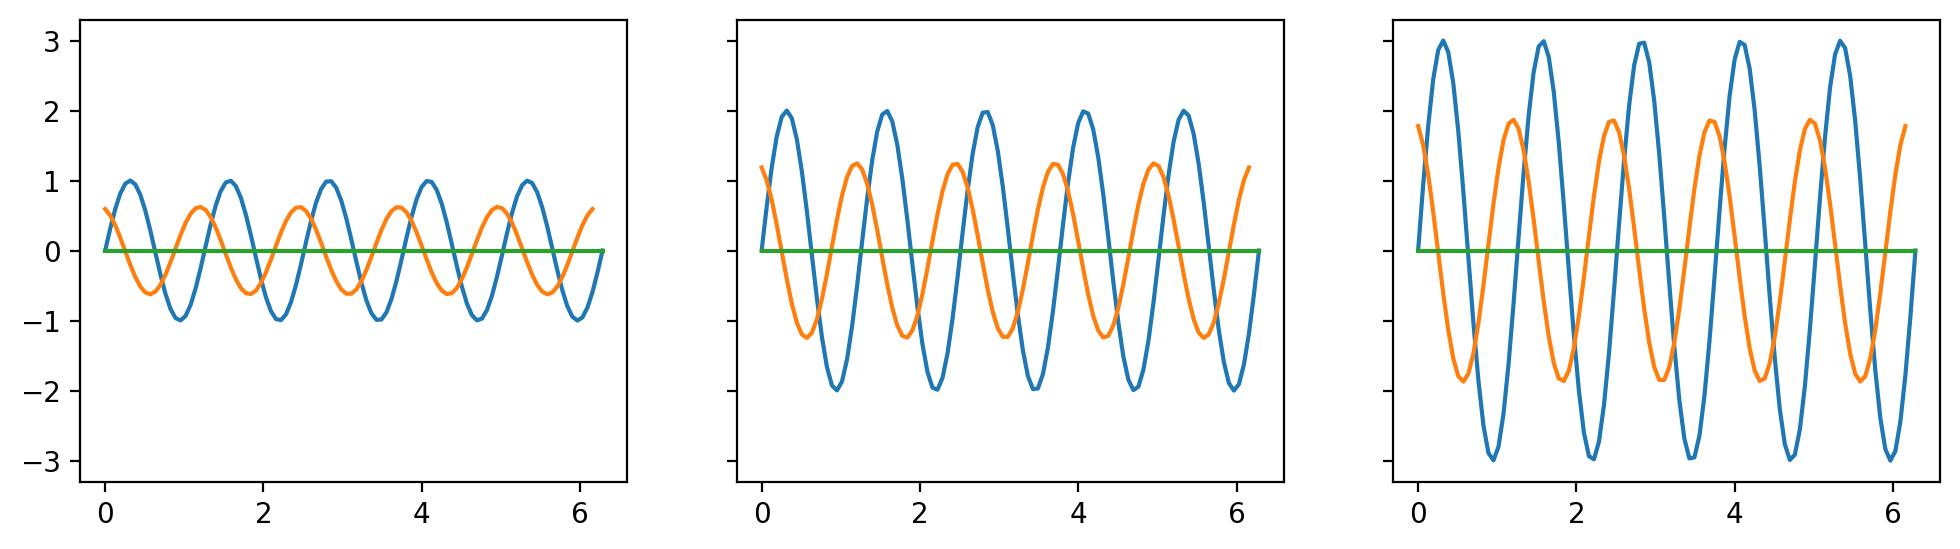

complex_func


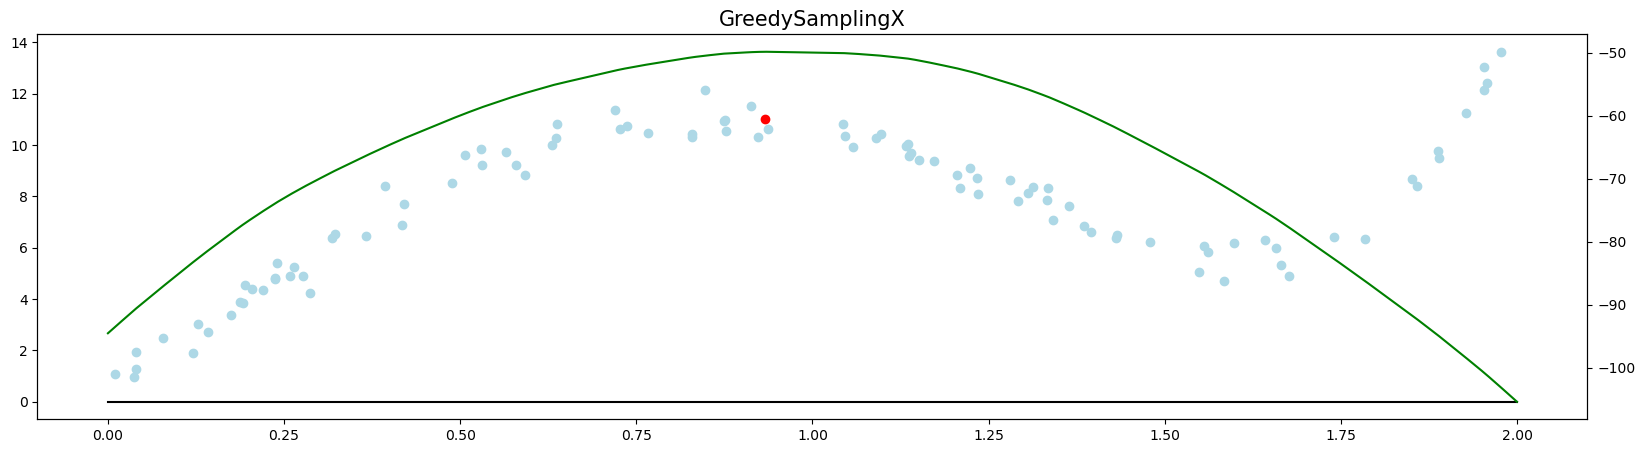

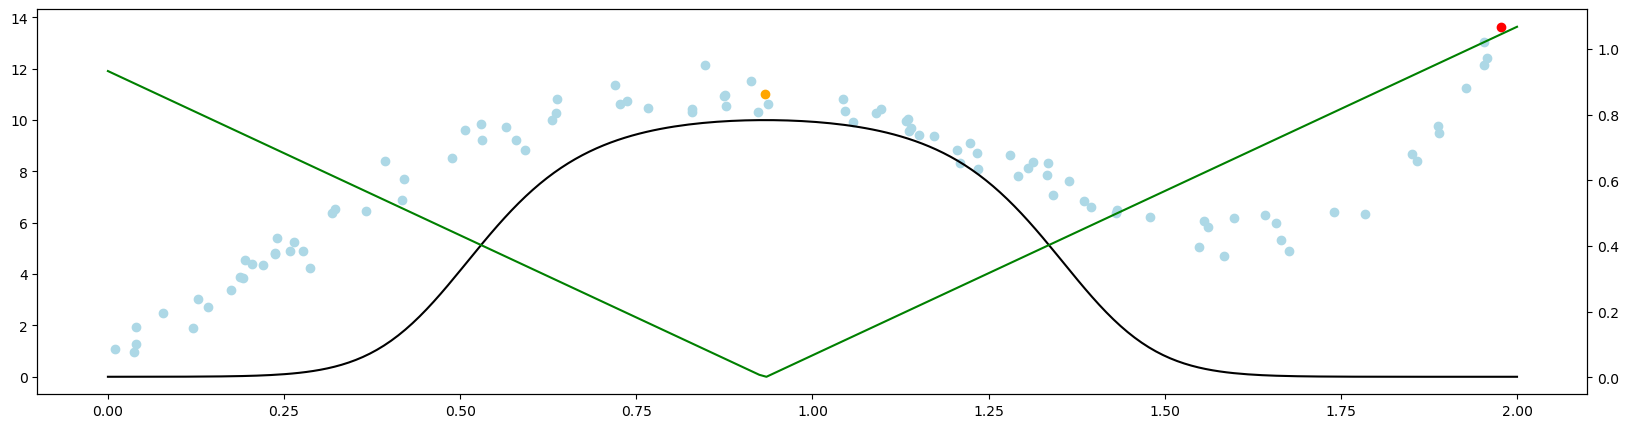

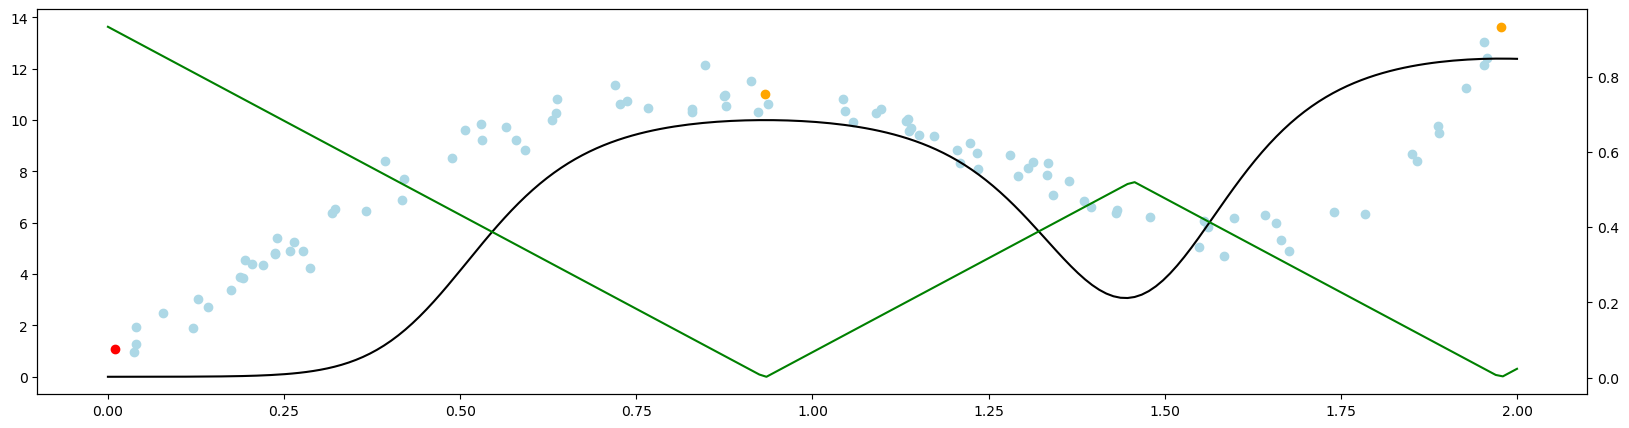

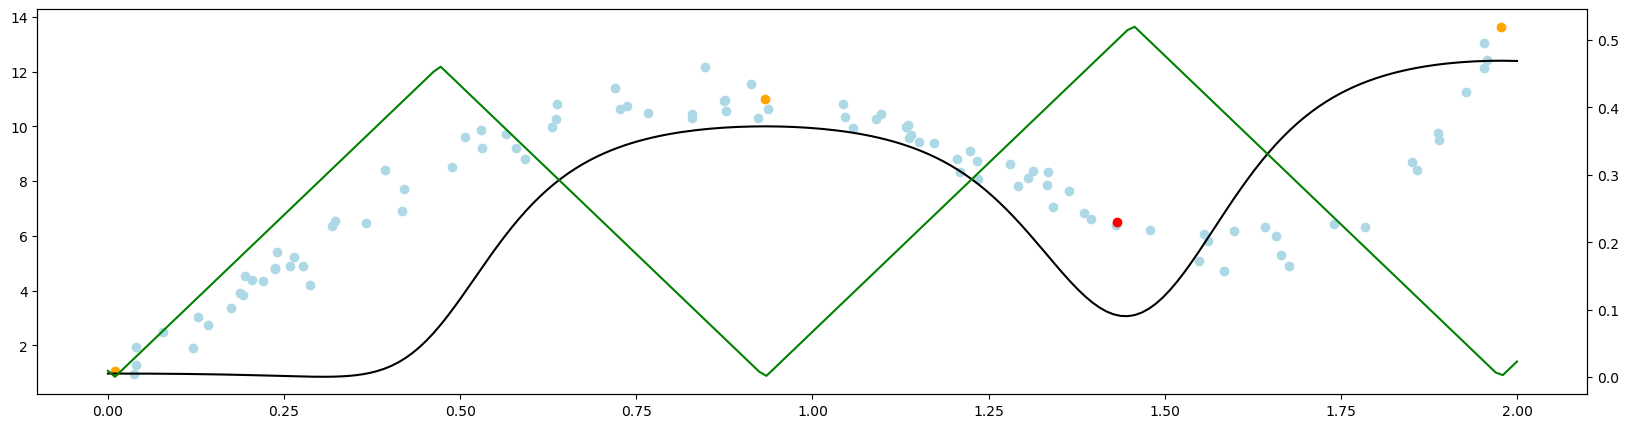

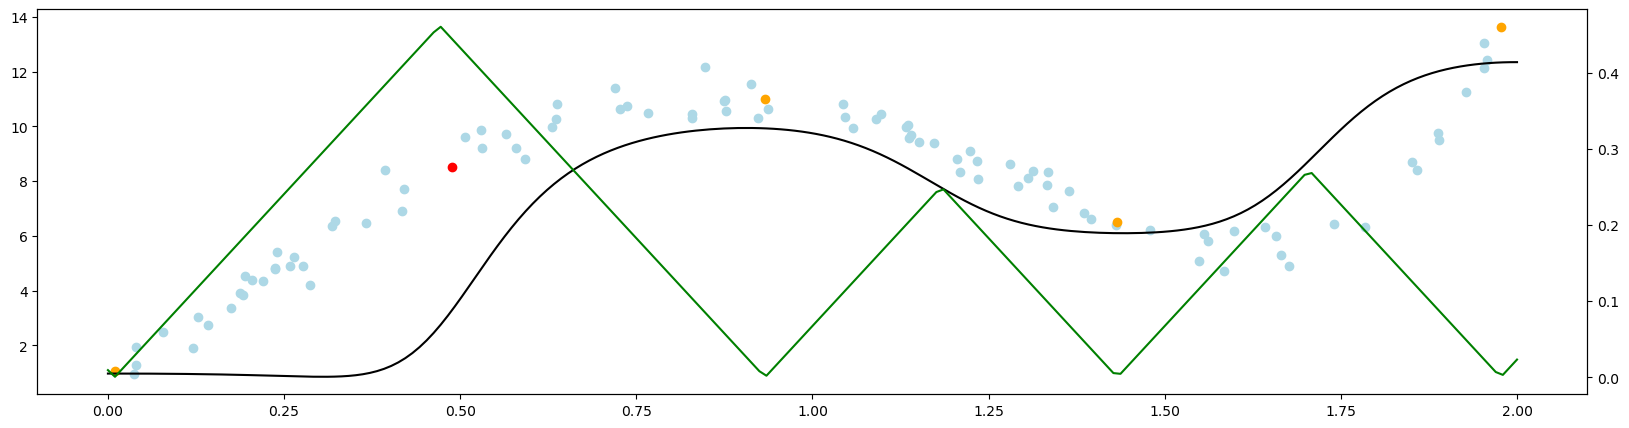

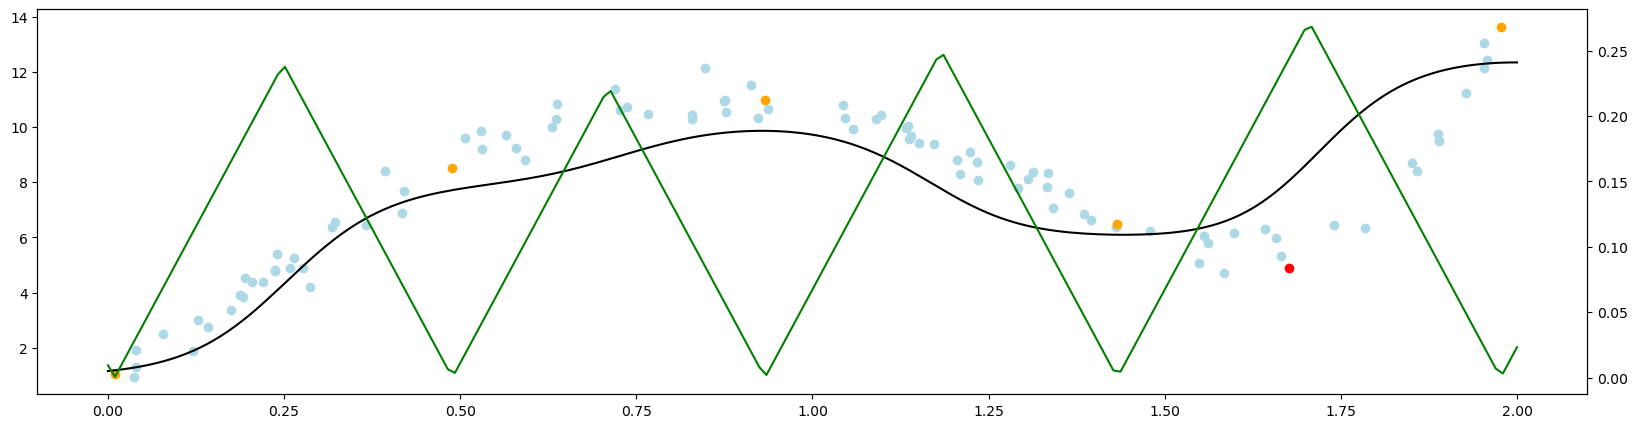

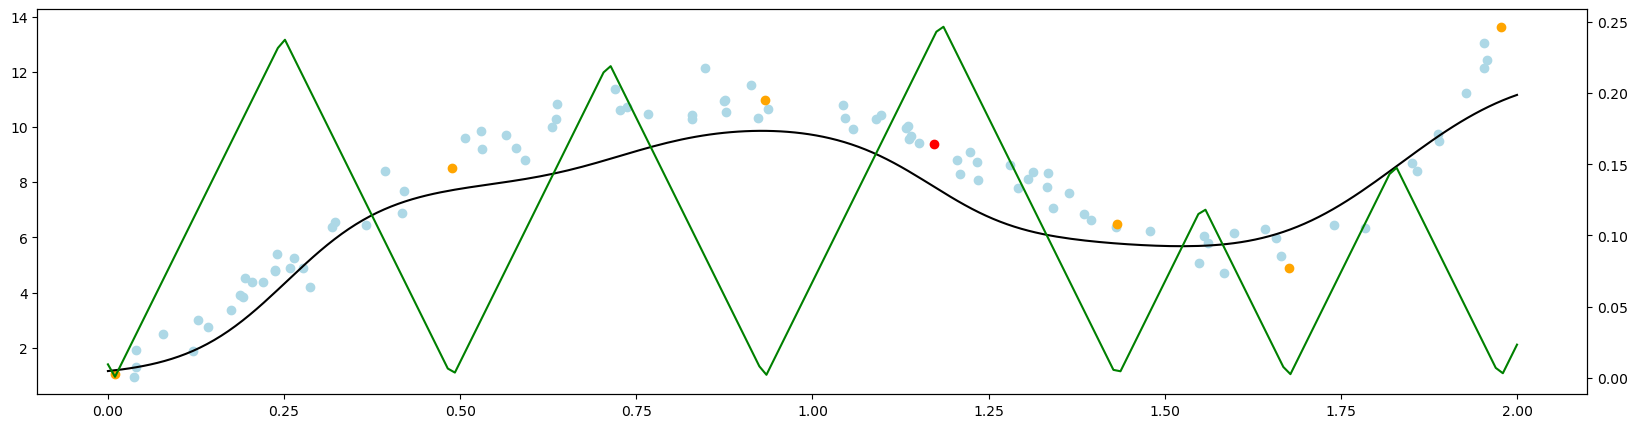

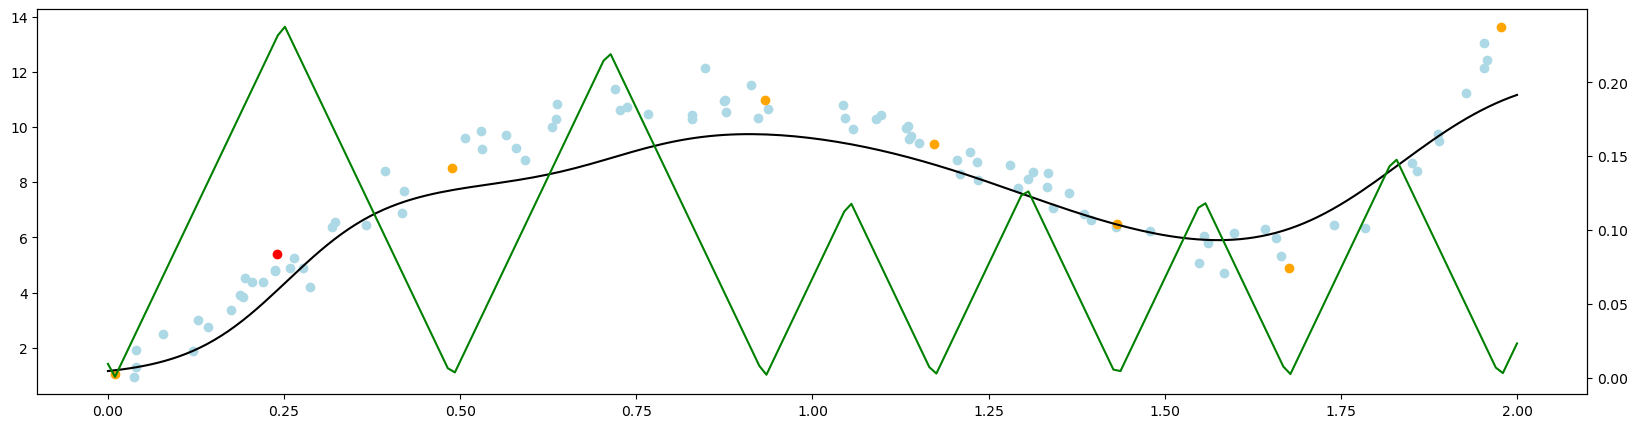

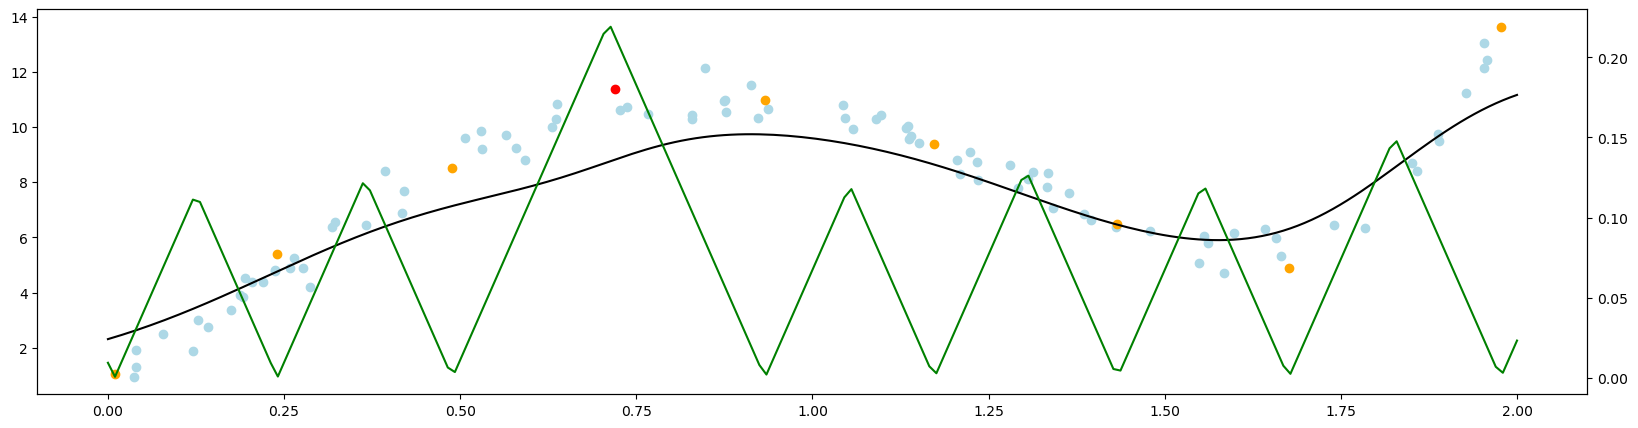

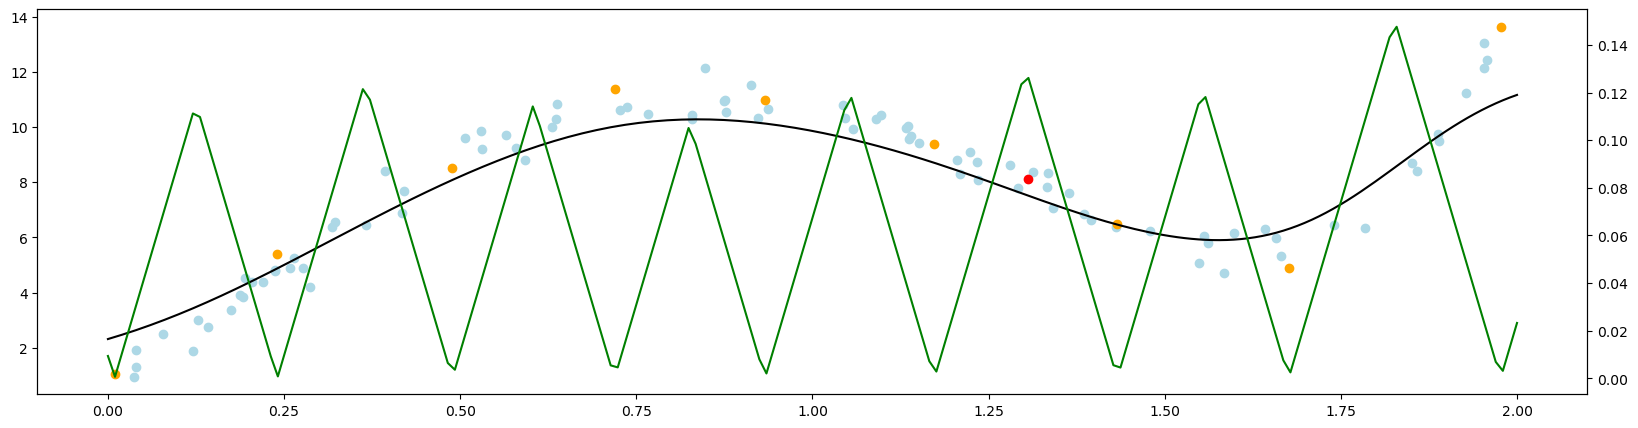

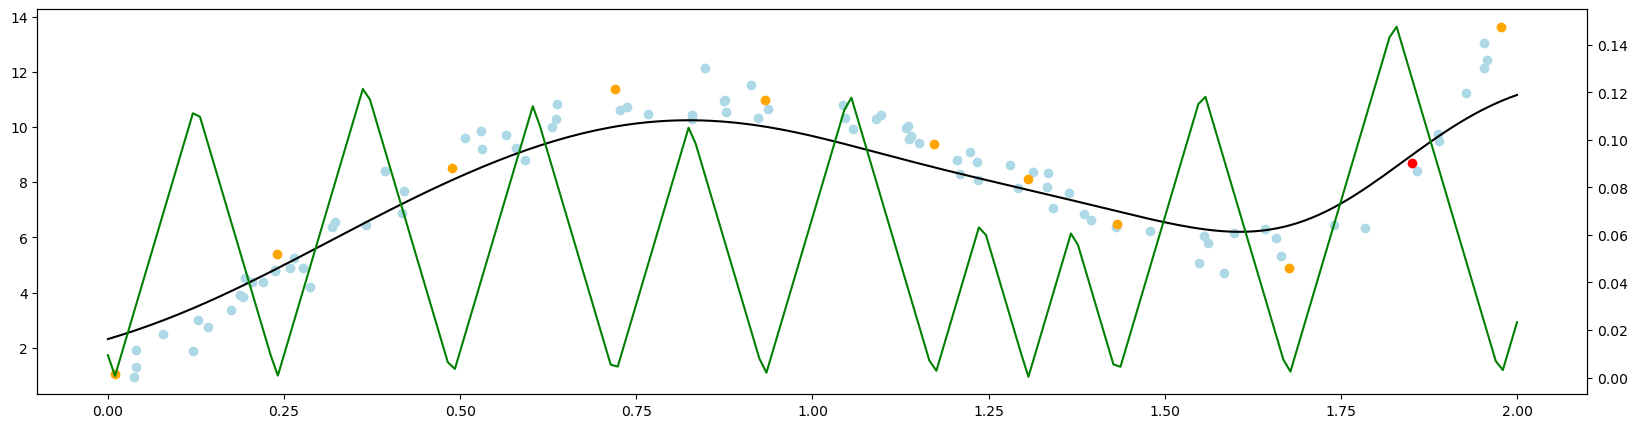

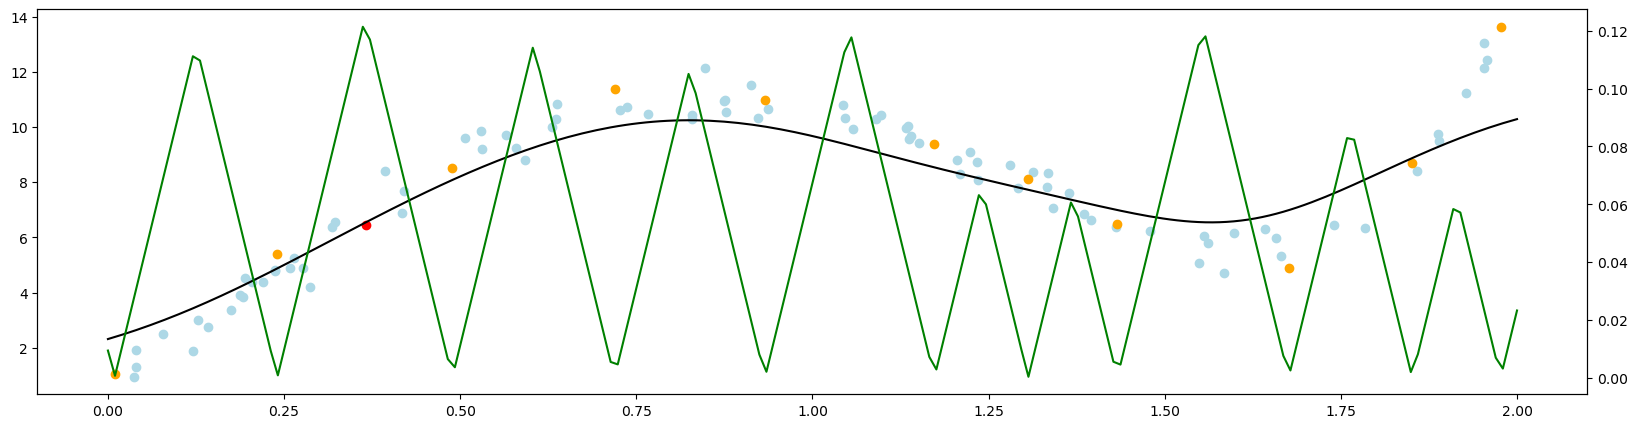

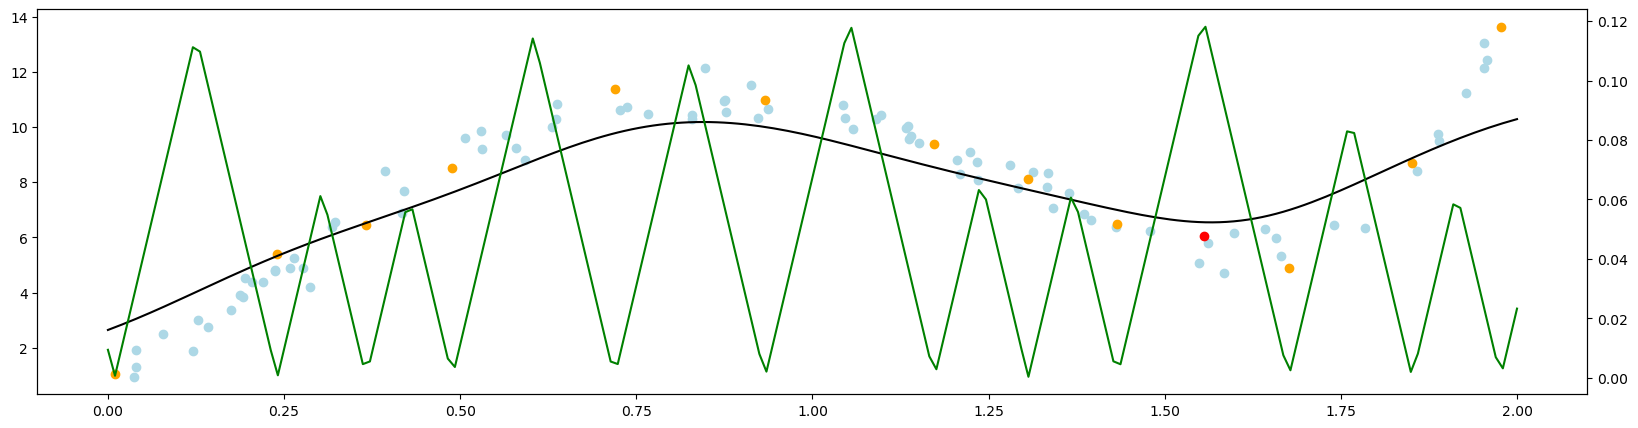

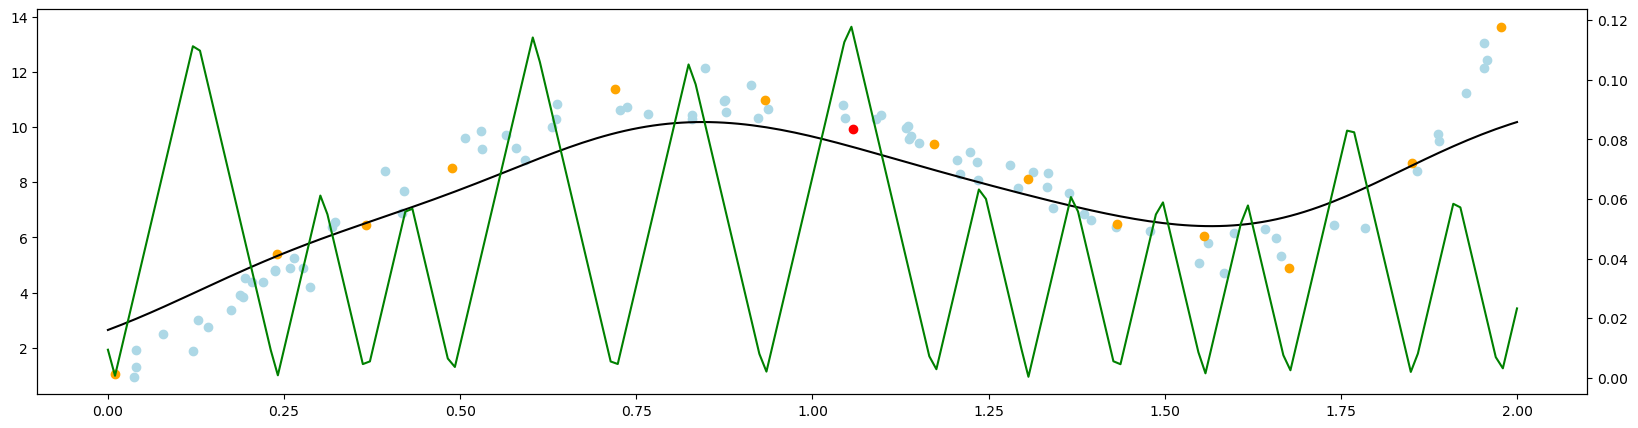

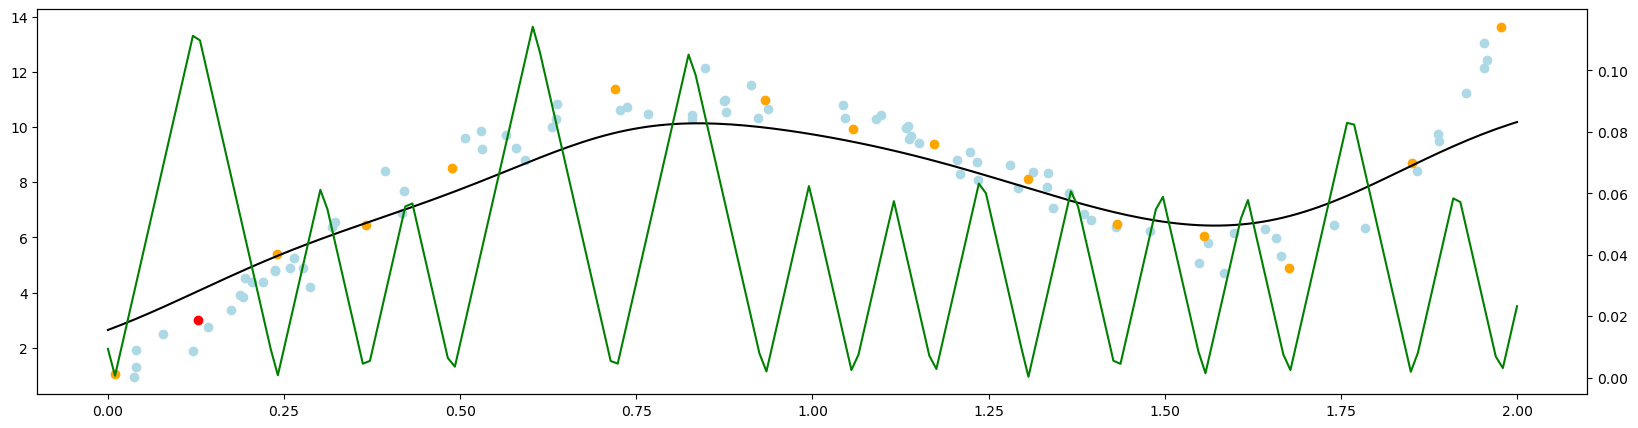

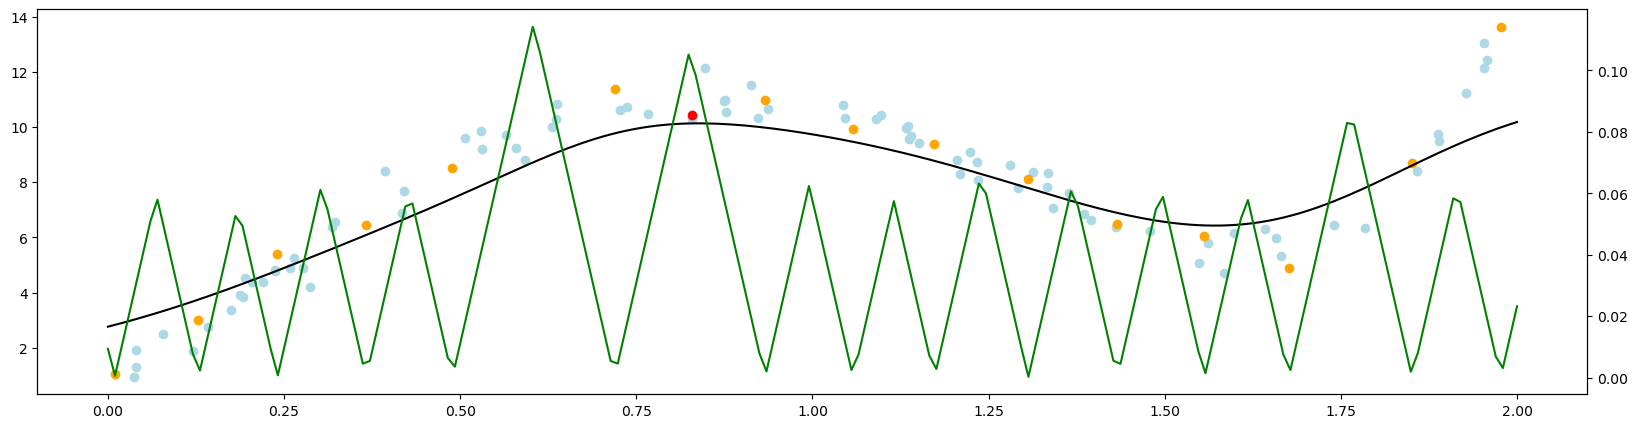

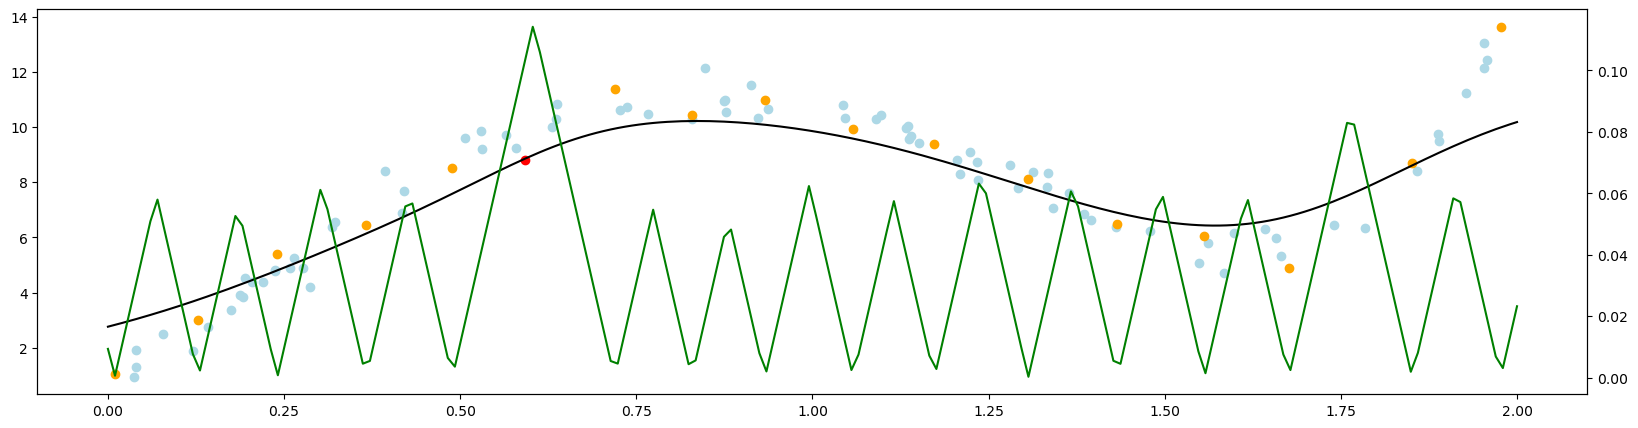

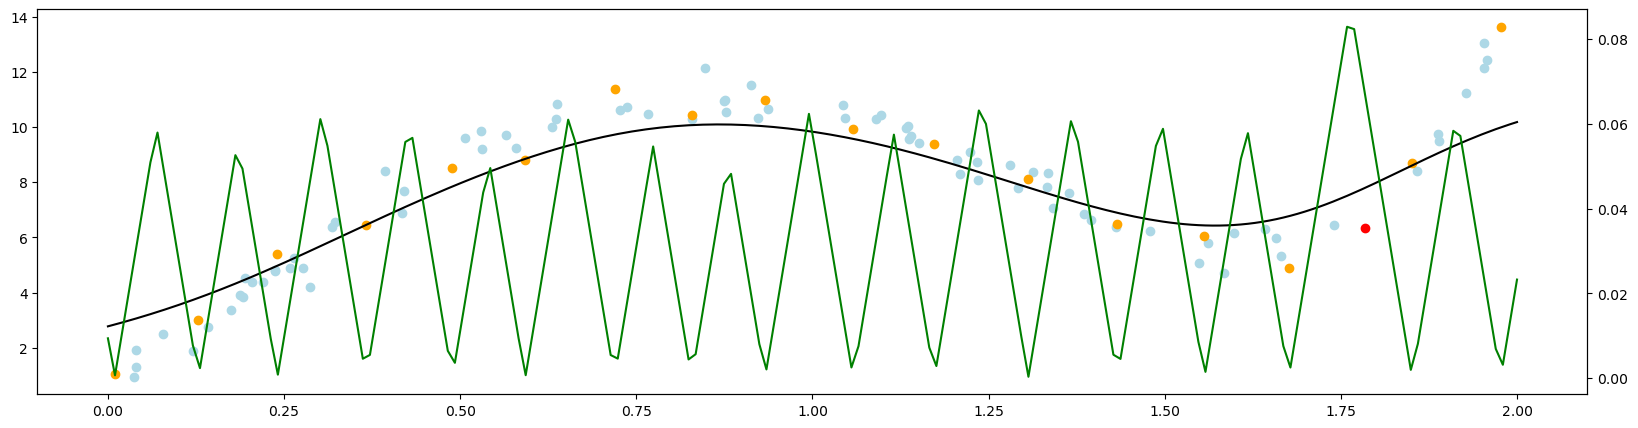

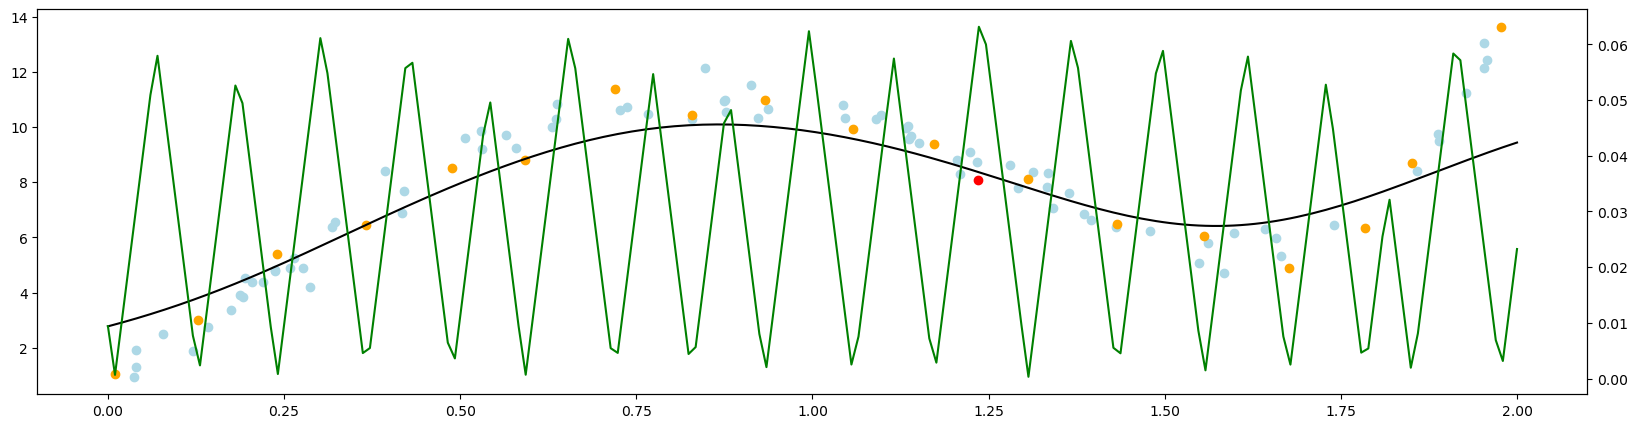

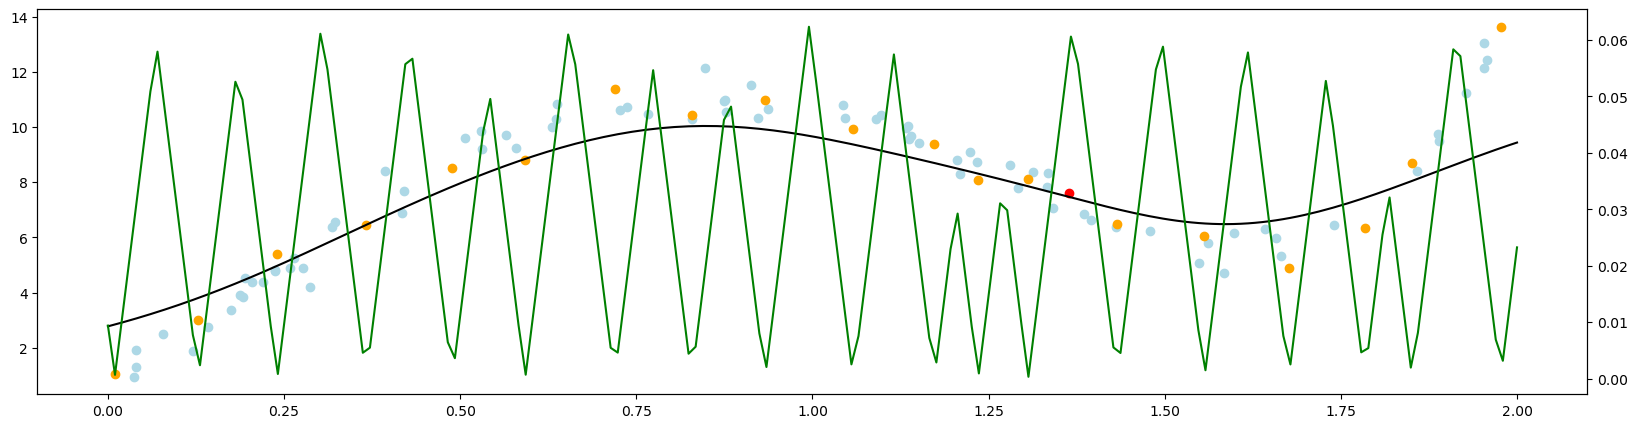

In [36]:
for variant in ['complex_func']:#, 'high_noise', 'high_density_diff']:
    print(variant)

    true_function, X, noise = settings[variant] # select another data set here
    X = X.reshape(-1, 1)
    y_true = true_function(X) + noise
    X_test = np.linspace(0, 2, num=200).reshape(-1, 1)

    qs_s = [
        GreedySamplingX(random_state=random_state),
        # GreedySamplingTarget(random_state=random_state),
        # QueryByCommittee(random_state=random_state),
        # KLDivergenceMaximization(
        #     random_state=random_state,
        #     integration_dict_target_val={
        #         "method": "assume_linear",
        #         "n_integration_samples": 3,
        #     },
        #     integration_dict_cross_entropy={
        #         "method": "assume_linear",
        #         "n_integration_samples": 3,
        #     }
        # ),
    ]

    y = np.full_like(y_true, np.nan)
    y_s = [y.copy() for _ in range(len(qs_s))]

    reg = NICKernelRegressor(metric_dict={'gamma': 15.0})

    for i in range(n_iterations):
        fig, axes = plt.subplots(1, len(qs_s), figsize=(20, 5))
        axes = [axes, ] if len(qs_s)==1 else axes

        for qs, ax, y in zip(qs_s, axes, y_s):
            reg.fit(X, y)
            indices, utils = call_func(qs.query,
                X=X,
                y=y,
                reg=reg,
                ensemble=SklearnRegressor(BaggingRegressor(reg, n_estimators=4)),
                fit_reg=True,
                return_utilities=True,
            )
            _, utilities_test = call_func(qs.query,
                X=X,
                y=y,
                reg=reg,
                ensemble=SklearnRegressor(BaggingRegressor(reg, n_estimators=4)),
                candidates=X_test,
                fit_reg=True,
                return_utilities=True,
            )
            old_is_lbld = is_labeled(y)
            y[indices] = y_true[indices]
            is_lbld = is_labeled(y)
            ax_t = ax.twinx()
            ax_t.plot(X_test, utilities_test.flatten(), c='green')

            ax.scatter(X[~is_lbld], y_true[~is_lbld], c='lightblue')
            ax.scatter(X[old_is_lbld], y[old_is_lbld], c='orange')
            ax.scatter(X[indices], y[indices], c='red')

            y_pred, y_std = reg.predict(X_test, return_std=True)
            ax.plot(X_test, y_pred, c='black')
            if i == 0:
                ax.set_title(qs.__class__.__name__, fontdict={'fontsize': 15})

        plt.show()